In [1]:
import pandas as pd
import networkx as nx
import pickle as pk

In [2]:
def overlap_set_genes(setA, setB):    
    """
    Accepts to lists
    M is the population size (previously N)
    n is the number of successes in the population
    N is the sample size (previously n)
    x is still the number of drawn “successes”
    """
    M= G_ppi_lcc.number_of_nodes() #total number of genes
    n= len(setA)
    N= len(setB)
    x= len(setA.intersection(setB))
    return str(stats.hypergeom.sf(x-1, M, n, N))

def overlap_genelists(lstA, lstB,genebackground):
    import scipy.stats as stats
    """
    Accepts to lists
    M is the population size (previously N)
    n is the number of successes in the population
    N is the sample size (previously n)
    x is still the number of drawn “successes”
    """
    setA= set(lstA)
    setB= set(lstB)
    M= genebackground #total number of genes
    n= len(setA)
    N= len(setB)
    x= len(setA.intersection(setB))


    return str(stats.hypergeom.sf(x-1, M, n, N))

from statsmodels.sandbox.stats.multicomp import multipletests
def fdr_adjustment(list_of_pvals,alpha):    
    return multipletests(list_of_pvals,alpha=alpha,method='fdr_bh')[1] #the benjamin hochberg method is used

In [32]:
#Let's import the general PPI

ppi = pd.read_csv("input/ppi_symbol_lcc.csv",delimiter= ',',    #import the PPI
           skipinitialspace=True)

G_ppi = nx.from_pandas_edgelist(ppi, 'symbol1', 'symbol2')
G_ppi.remove_edges_from(nx.selfloop_edges(G_ppi))
G_ppi_lcc = G_ppi.subgraph(max(nx.connected_components(G_ppi), key=len))  # extract lcc graph
print(G_ppi_lcc.number_of_nodes())
print(G_ppi_lcc.number_of_edges())


#Let's import also the BPA-signature from CTD
#We are downloading the BPA chemical-gene interactions from CTD, selecting only the human organism
#http://ctdbase.org/query.go?type=ixn&chemqt=equals&chem=name%3Abisphenol+A&actionDegreeTypes=increases&actionDegreeTypes=decreases&actionDegreeTypes=affects&actionTypes=ANY&geneqt=equals&gene=&pathwayqt=equals&pathway=&taxonqt=equals&taxon=TAXON%3A9606&goqt=equals&go=&sort=chemNmSort&perPage=50&action=Search

bpa_gene_interactions=pd.read_csv("input/CTD_ixns_20220914111055.tsv", sep="\t")

bpa_genes=set(bpa_gene_interactions['Gene Symbol'].tolist())

bpa_genes_ppi=bpa_genes&G_ppi.nodes()

print(len(bpa_genes_ppi))

18815
478345
9650


In [5]:
bpa_heart_l_df=pd.read_excel("input/Supplementary table 1_new peptides_final_for paper.xlsx", sheet_name="Suppl table 1D",skiprows=2)
bpa_heart_m_df=pd.read_excel("input/Supplementary table 1_new peptides_final_for paper.xlsx", sheet_name="Suppl table 1E",skiprows=2)
bpa_heart_h_df=pd.read_excel("input/Supplementary table 1_new peptides_final_for paper.xlsx", sheet_name="Suppl table 1F",skiprows=2)




In [6]:
gene_background=pd.read_excel("input/Supplementary table 1_new peptides_final_for paper.xlsx", sheet_name="Suppl table 1A",skiprows=2)['Gene names'].tolist()


In [7]:
gene_background_cleaned=[]
for gene in gene_background:
    if str(gene)!='nan':
        try:
            gene_background_cleaned.extend(gene.split(";"))
        except:
            pass
len(gene_background_cleaned)

4754

In [8]:
heart_bpa_l_up=[]
heart_bpa_l_down=[]
for i,v in bpa_heart_l_df.iterrows():
    if "up" in v['Differentially abundant']:
        heart_bpa_l_up.append(v['Genes'])
    elif "down" in v['Differentially abundant']:
        heart_bpa_l_down.append(v['Genes'])
    else:
        pass
    
heart_bpa_m_up=[]
heart_bpa_m_down=[]
for i,v in bpa_heart_m_df.iterrows():
    if "up" in v['Differentially abundant']:
        heart_bpa_m_up.append(v['Genes'])
    elif "down" in v['Differentially abundant']:
        heart_bpa_m_down.append(v['Genes'])
    else:
        pass
    
heart_bpa_h_up=[]
heart_bpa_h_down=[]
for i,v in bpa_heart_h_df.iterrows():
    if "up" in v['Differentially abundant']:
        heart_bpa_h_up.append(v['Genes'])
    elif "down" in v['Differentially abundant']:
        heart_bpa_h_down.append(v['Genes'])
    else:
        pass

In [9]:
heart_deg_l=set(heart_bpa_l_up).union(set(heart_bpa_l_down))
heart_deg_m=set(heart_bpa_m_up).union(set(heart_bpa_m_down))
heart_deg_h=set(heart_bpa_h_up).union(set(heart_bpa_h_down))


genelists=[heart_bpa_l_up,heart_bpa_m_up,heart_bpa_h_up,heart_bpa_l_down,heart_bpa_m_down,heart_bpa_h_down,
          heart_deg_l,heart_deg_m,heart_deg_h]
genelists_names=["heart_bpa_l_up","heart_bpa_m_up","heart_bpa_h_up","heart_bpa_l_down","heart_bpa_m_down","heart_bpa_h_down",
          "heart_deg_l","heart_deg_m","heart_deg_h"]


heart_degs_ppi_dict={}

for i in range(len(genelists_names)):
    heart_degs_ppi_dict[genelists_names[i]]=set(genelists[i])&G_ppi.nodes()
    


In [30]:
#I just want to check the proteins that are in at least two conditions:
import collections
overlapping_genes_threeconditions=[]
twocondition_genes=[]
full_unionlist_allconditions=[]

for protein in heart_deg_l:
    full_unionlist_allconditions.append(protein)
for protein in heart_deg_m:
    full_unionlist_allconditions.append(protein)
for protein in heart_deg_h:
    full_unionlist_allconditions.append(protein)
    
full_unionlist_allconditions_counter = collections.Counter(full_unionlist_allconditions)

for gene,fr in full_unionlist_allconditions_counter.items():
    if fr>1:
        twocondition_genes.append(gene)
for gene,fr in full_unionlist_allconditions_counter.items():
    if fr>2:
        overlapping_genes_threeconditions.append(gene)
print(len(twocondition_genes))
print(len(overlapping_genes_threeconditions))

21
6


In [17]:
#Let's compute the p-value of the intersection between the known BPA-signature from CTD and all perturbed genes
bpa_genes_gene_background=set(bpa_genes)&set(gene_background_cleaned)
print(overlap_genelists(set(full_unionlist_allconditions),set(bpa_genes_gene_background),len(gene_background_cleaned)))


6.328059683924169e-05


In [18]:
#From http://amigo.geneontology.org/amigo/term/GO:0005604
basal_membrane_human_ann_list=pd.read_csv("input/basement_membrane.txt",sep="\t")['Gene_symbol'].tolist()

In [32]:
set(twocondition_genes).intersection(set(basal_membrane_human_ann_list))

{'COL4A1', 'COL4A2', 'LAMC1', 'NID2', 'VTN'}

In [33]:
overlap_genelists(twocondition_genes,basal_membrane_human_ann_list,4620)

'2.85338008627685e-05'

In [22]:
import random as rd
import numpy as np

bpa_l_random_lccs = []
bpa_m_random_lccs = []
bpa_h_random_lccs = []


G_sub = nx.subgraph(G_ppi,set(heart_degs_ppi_dict['heart_deg_l']))
G_sub_lcc = G_sub.subgraph(max(nx.connected_components(G_sub), key=len))  # extract lcc graph
low_f_lcc_size= G_sub_lcc.number_of_nodes()
S = 1000
for s in range(S):
    gene_sample = rd.sample(G_ppi.nodes(),len(set(heart_degs_ppi_dict['heart_deg_l'])))
    G_sub_rnd = nx.subgraph(G_ppi,gene_sample)
    G_sub_rnd_lcc = G_sub_rnd.subgraph(max(nx.connected_components(G_sub_rnd), key=len))  # extract lcc graph
    lcc_size = G_sub_rnd_lcc.number_of_nodes()
    bpa_l_random_lccs.append(lcc_size)
    mu = np.mean(bpa_l_random_lccs)
    std = np.std(bpa_l_random_lccs)
z = round(((low_f_lcc_size-mu)/std),3)
print("The z-score for low BPA %s" %z)
  
G_sub = nx.subgraph(G_ppi,set(heart_degs_ppi_dict['heart_deg_m']))
G_sub_lcc = G_sub.subgraph(max(nx.connected_components(G_sub), key=len))  # extract lcc graph
medium_f_lcc_size= G_sub_lcc.number_of_nodes()
for s in range(S):
    gene_sample = rd.sample(G_ppi.nodes(),len(set(heart_degs_ppi_dict['heart_deg_m'])))
    G_sub_rnd = nx.subgraph(G_ppi,gene_sample)
    G_sub_rnd_lcc = G_sub_rnd.subgraph(max(nx.connected_components(G_sub_rnd), key=len))  # extract lcc graph
    lcc_size = G_sub_rnd_lcc.number_of_nodes()
    bpa_m_random_lccs.append(lcc_size)    
    mu = np.mean(bpa_m_random_lccs)
    std = np.std(bpa_m_random_lccs)
z = round(((medium_f_lcc_size-mu)/std),3)
print("The z-score for medium BPA %s" %z)

G_sub = nx.subgraph(G_ppi,set(heart_degs_ppi_dict['heart_deg_h']))
G_sub_lcc = G_sub.subgraph(max(nx.connected_components(G_sub), key=len))  # extract lcc graph
high_f_lcc_size= G_sub_lcc.number_of_nodes()
for s in range(S):
    gene_sample = rd.sample(G_ppi.nodes(),len(set(heart_degs_ppi_dict['heart_deg_h'])))
    G_sub_rnd = nx.subgraph(G_ppi,gene_sample)
    G_sub_rnd_lcc = G_sub_rnd.subgraph(max(nx.connected_components(G_sub_rnd), key=len))  # extract lcc graph
    lcc_size = G_sub_rnd_lcc.number_of_nodes()
    bpa_h_random_lccs.append(lcc_size)    
    mu = np.mean(bpa_h_random_lccs)
    std = np.std(bpa_h_random_lccs)
z = round(((high_f_lcc_size-mu)/std),3)
print("The z-score for high BPA %s" %z)

The z-score for low BPA 14.085
The z-score for medium BPA 4.996
The z-score for high BPA 10.474


<ipython-input-543-69d54394ddd0>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in ax.get_yticks()], size = 36)
<ipython-input-543-69d54394ddd0>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), size = 36)


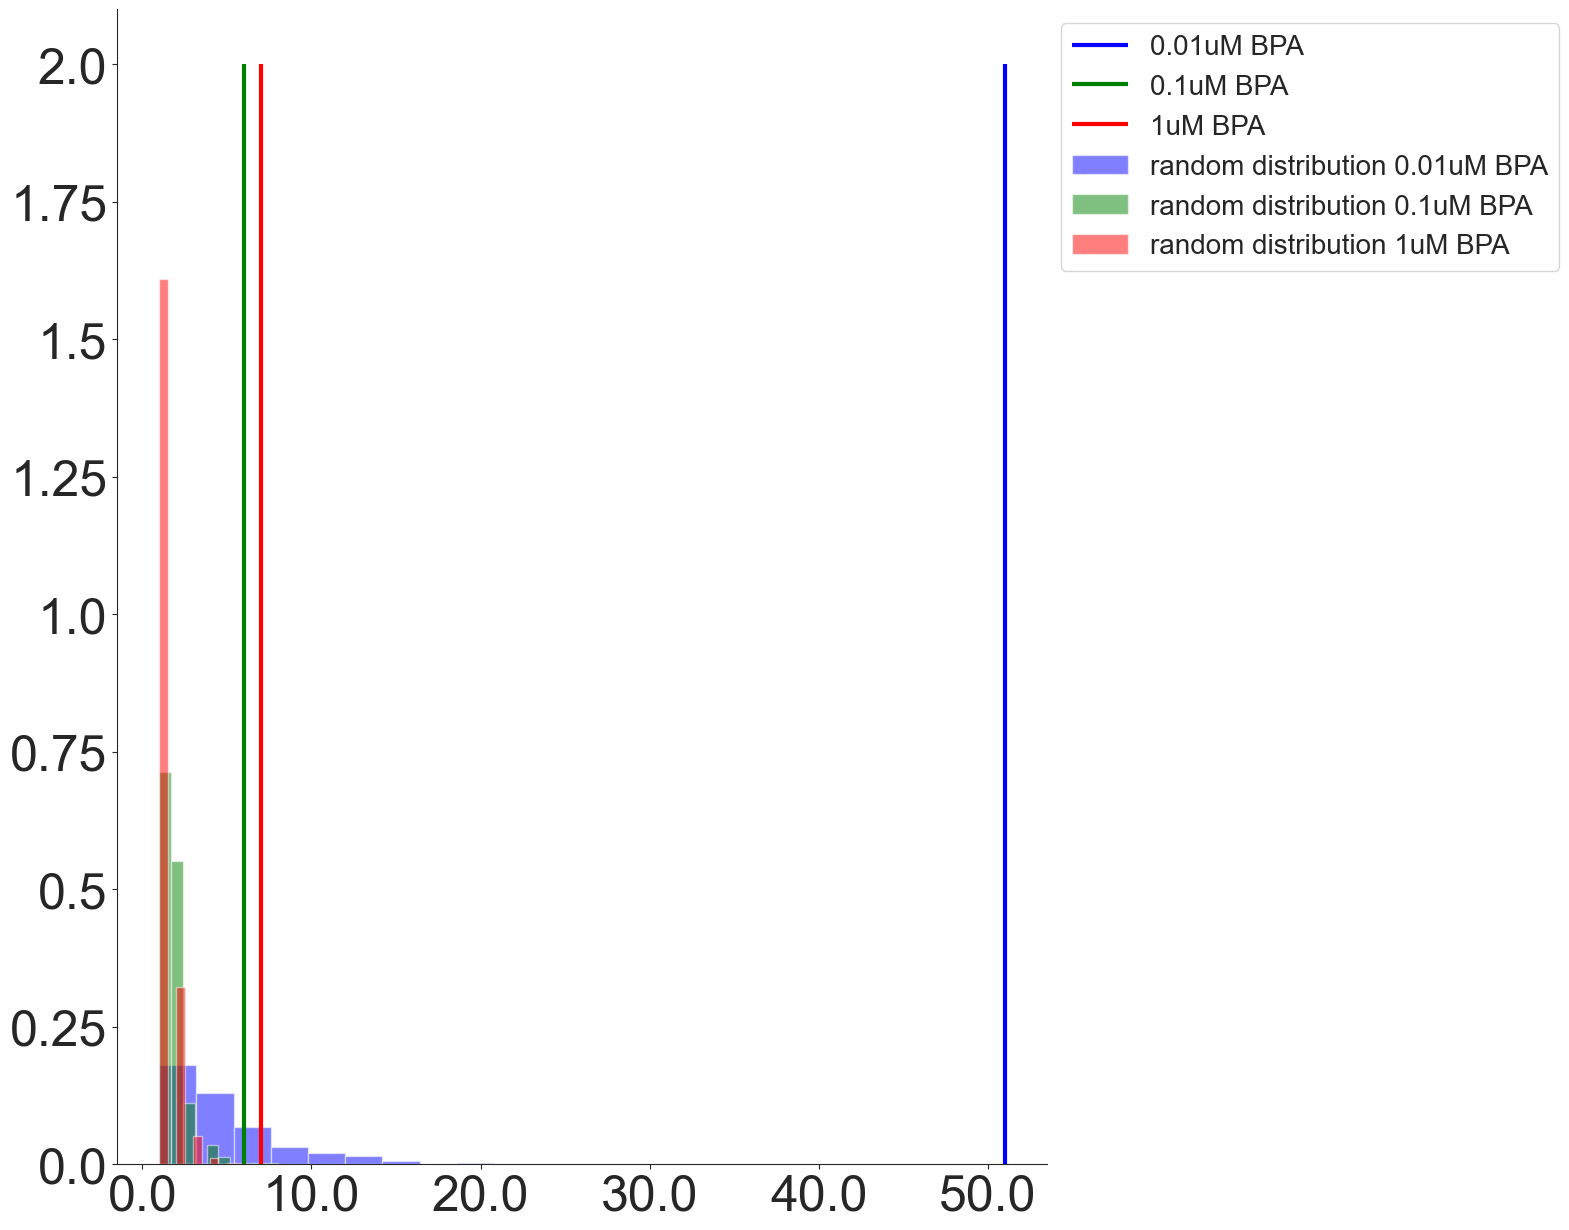

In [543]:
#Supplemebtary Figure 1A
import matplotlib.pyplot as plt
import seaborn as sns



# plot distributions for non-sampled case
fig, ax = plt.subplots(figsize=(15, 15))
sns.set_style('white')
sns.set_style("ticks", {"xtick.major.size": 15, "ytick.major.size": 15})

plt.vlines(low_f_lcc_size,ymin=0,ymax=2,linewidth=3,color='b',label='0.01uM BPA')
plt.vlines(medium_f_lcc_size,ymin=0,ymax=2,linewidth=3,color='g',label='0.1uM BPA')
plt.vlines(high_f_lcc_size,ymin=0,ymax=2,linewidth=3,color='r',label='1uM BPA')

plt.hist(bpa_l_random_lccs, 10, density = True, 
         histtype ='bar',
         color = 'b',alpha=.5,
         label = 'random distribution 0.01uM BPA')

plt.hist(bpa_m_random_lccs, 10, density = True, 
         histtype ='bar',
         color = 'g',alpha=.5,
         label = 'random distribution 0.1uM BPA')

plt.hist(bpa_h_random_lccs, 10, density = True, 
         histtype ='bar',
         color = 'r',alpha=.5,
         label = 'random distribution 1uM BPA')

#plt.legend(loc='upper right',fontsize=32)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=20)

#ax.set_xlabel("largest connected component size",fontsize=32)
#ax.set_ylabel("Density",fontsize=32)
ax.set_xlabel("",fontsize=32)
ax.set_ylabel("",fontsize=32)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_yticklabels([round(y,2) for y in ax.get_yticks()], size = 36)
ax.set_xticklabels(ax.get_xticks(), size = 36)
plt.savefig('Federica/Federica_Figures/Supp1A.png',format='png',dpi=300, bbox_inches = "tight")
plt.show()

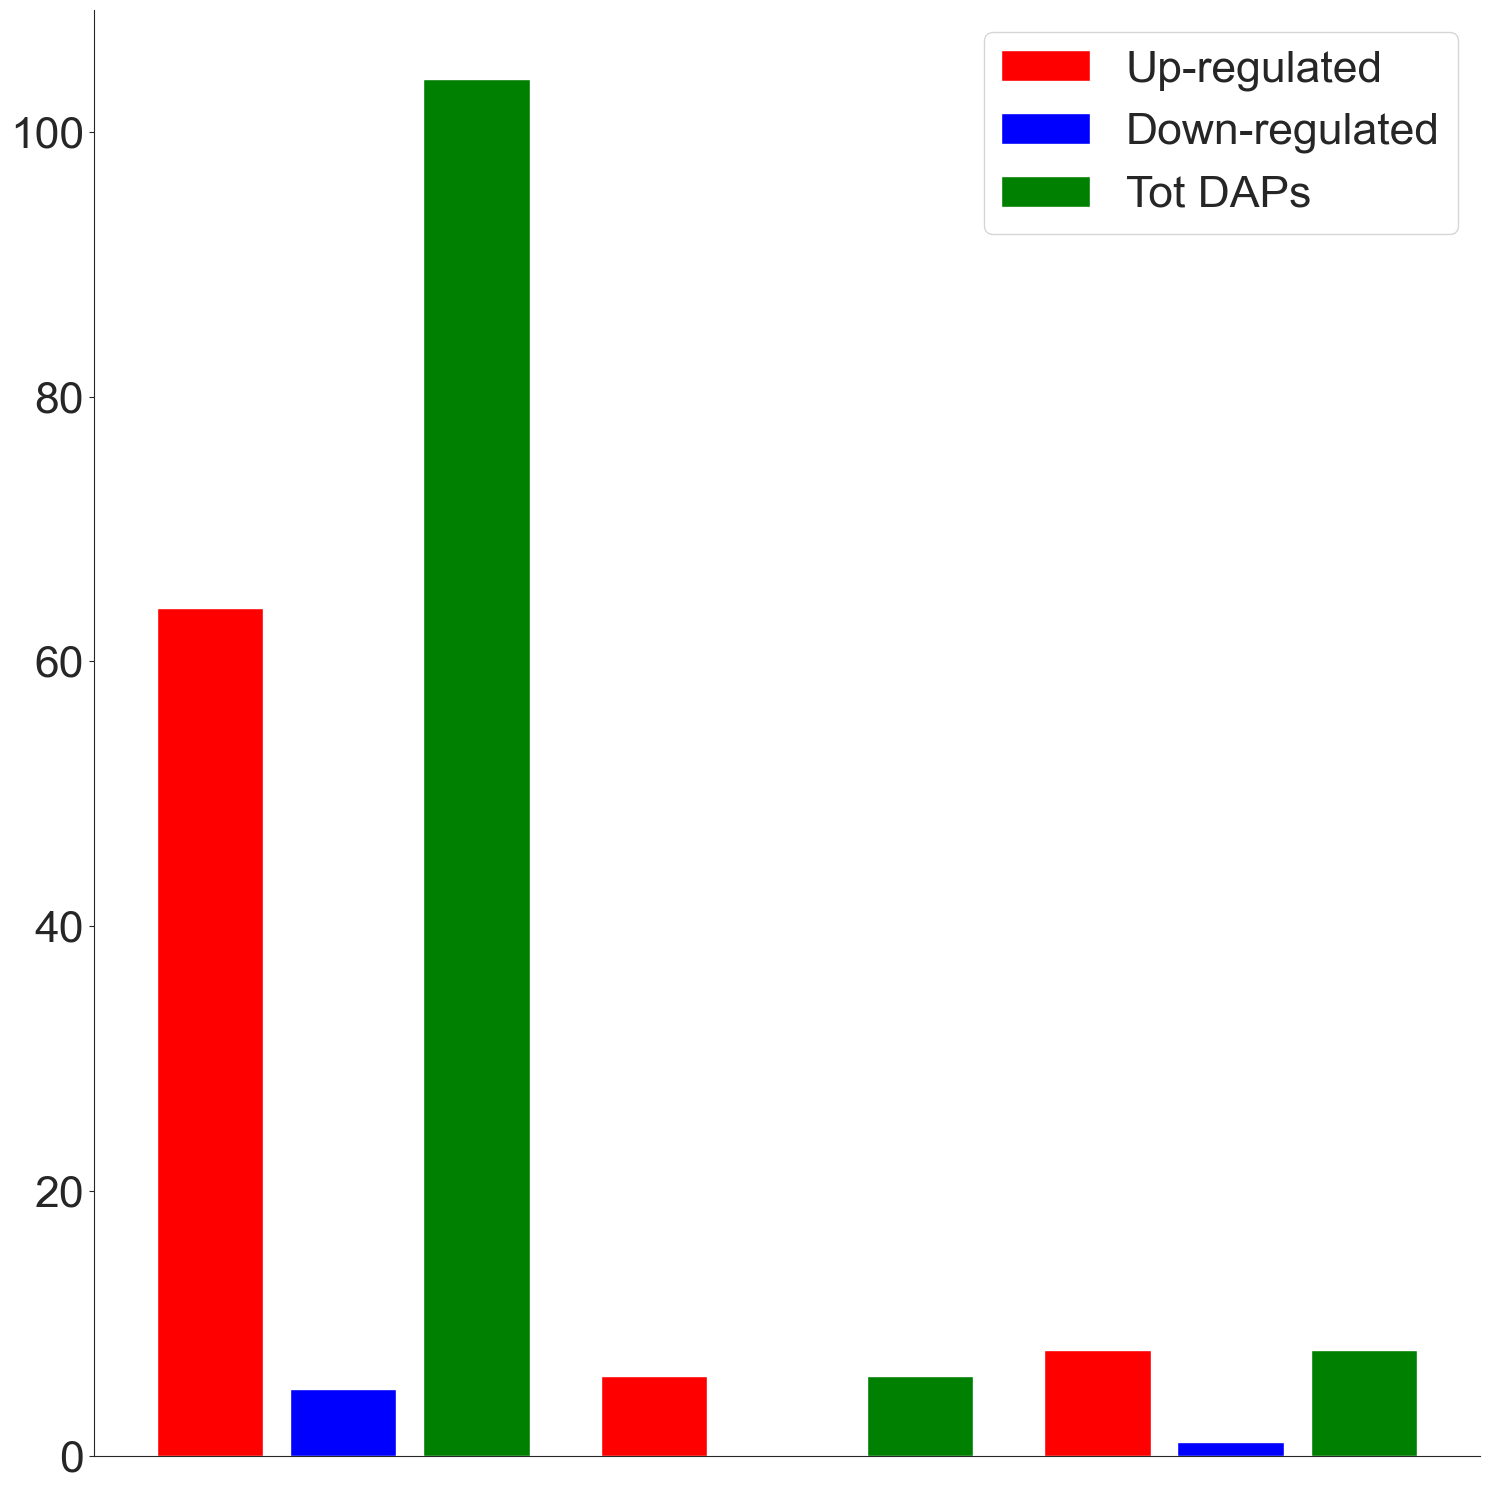

In [553]:
#Supplementary Figure 1B
#Increased ratio of connected component among the total proteins

import numpy as np
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(15,15))

ind = np.arange(3) 
width = 0.30




xvals = []
cond = ['l','m','h']
for c in cond:
    condition='heart_bpa_'+c+"_up"
    G_sub = nx.subgraph(G_ppi,set(heart_degs_ppi_dict[condition]))
    G_sub_lcc = G_sub.subgraph(max(nx.connected_components(G_sub), key=len))  # extract lcc graph
    xvals.append(G_sub_lcc.number_of_edges())


bar1 = plt.bar(ind, xvals, 0.8*width, color = 'r')
  
yvals = []
for c in cond:
    condition='heart_bpa_'+c+"_down"
    G_sub = nx.subgraph(G_ppi,set(heart_degs_ppi_dict[condition]))
    G_sub_lcc = G_sub.subgraph(max(nx.connected_components(G_sub), key=len))  # extract lcc graph
    yvals.append(G_sub_lcc.number_of_edges())

        
bar2 = plt.bar(ind+width, yvals, 0.8*width, color='b')
  
zvals = []
for c in cond:
    condition='heart_deg_'+c
    G_sub = nx.subgraph(G_ppi,set(heart_degs_ppi_dict[condition]))
    G_sub_lcc = G_sub.subgraph(max(nx.connected_components(G_sub), key=len))  # extract lcc graph
    zvals.append(G_sub_lcc.number_of_edges())

bar3 = plt.bar(ind+width*2, zvals, 0.8*width, color = 'g')

#plt.xlabel("Networks",fontsize=24)
#plt.ylabel('z-score',fontsize=24)
plt.xlabel("",fontsize=24)
plt.ylabel('',fontsize=24)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
  
ax1.set_xticks([], [])
plt.yticks(fontsize=32)
plt.legend( (bar1, bar2, bar3), ('Up-regulated', 'Down-regulated', 'Tot DAPs'),fontsize=32 )

plt.tight_layout()
plt.savefig('Federica/Federica_Figures/Supp1B.png',format='png',dpi=300, bbox_inches = "tight")
plt.show()

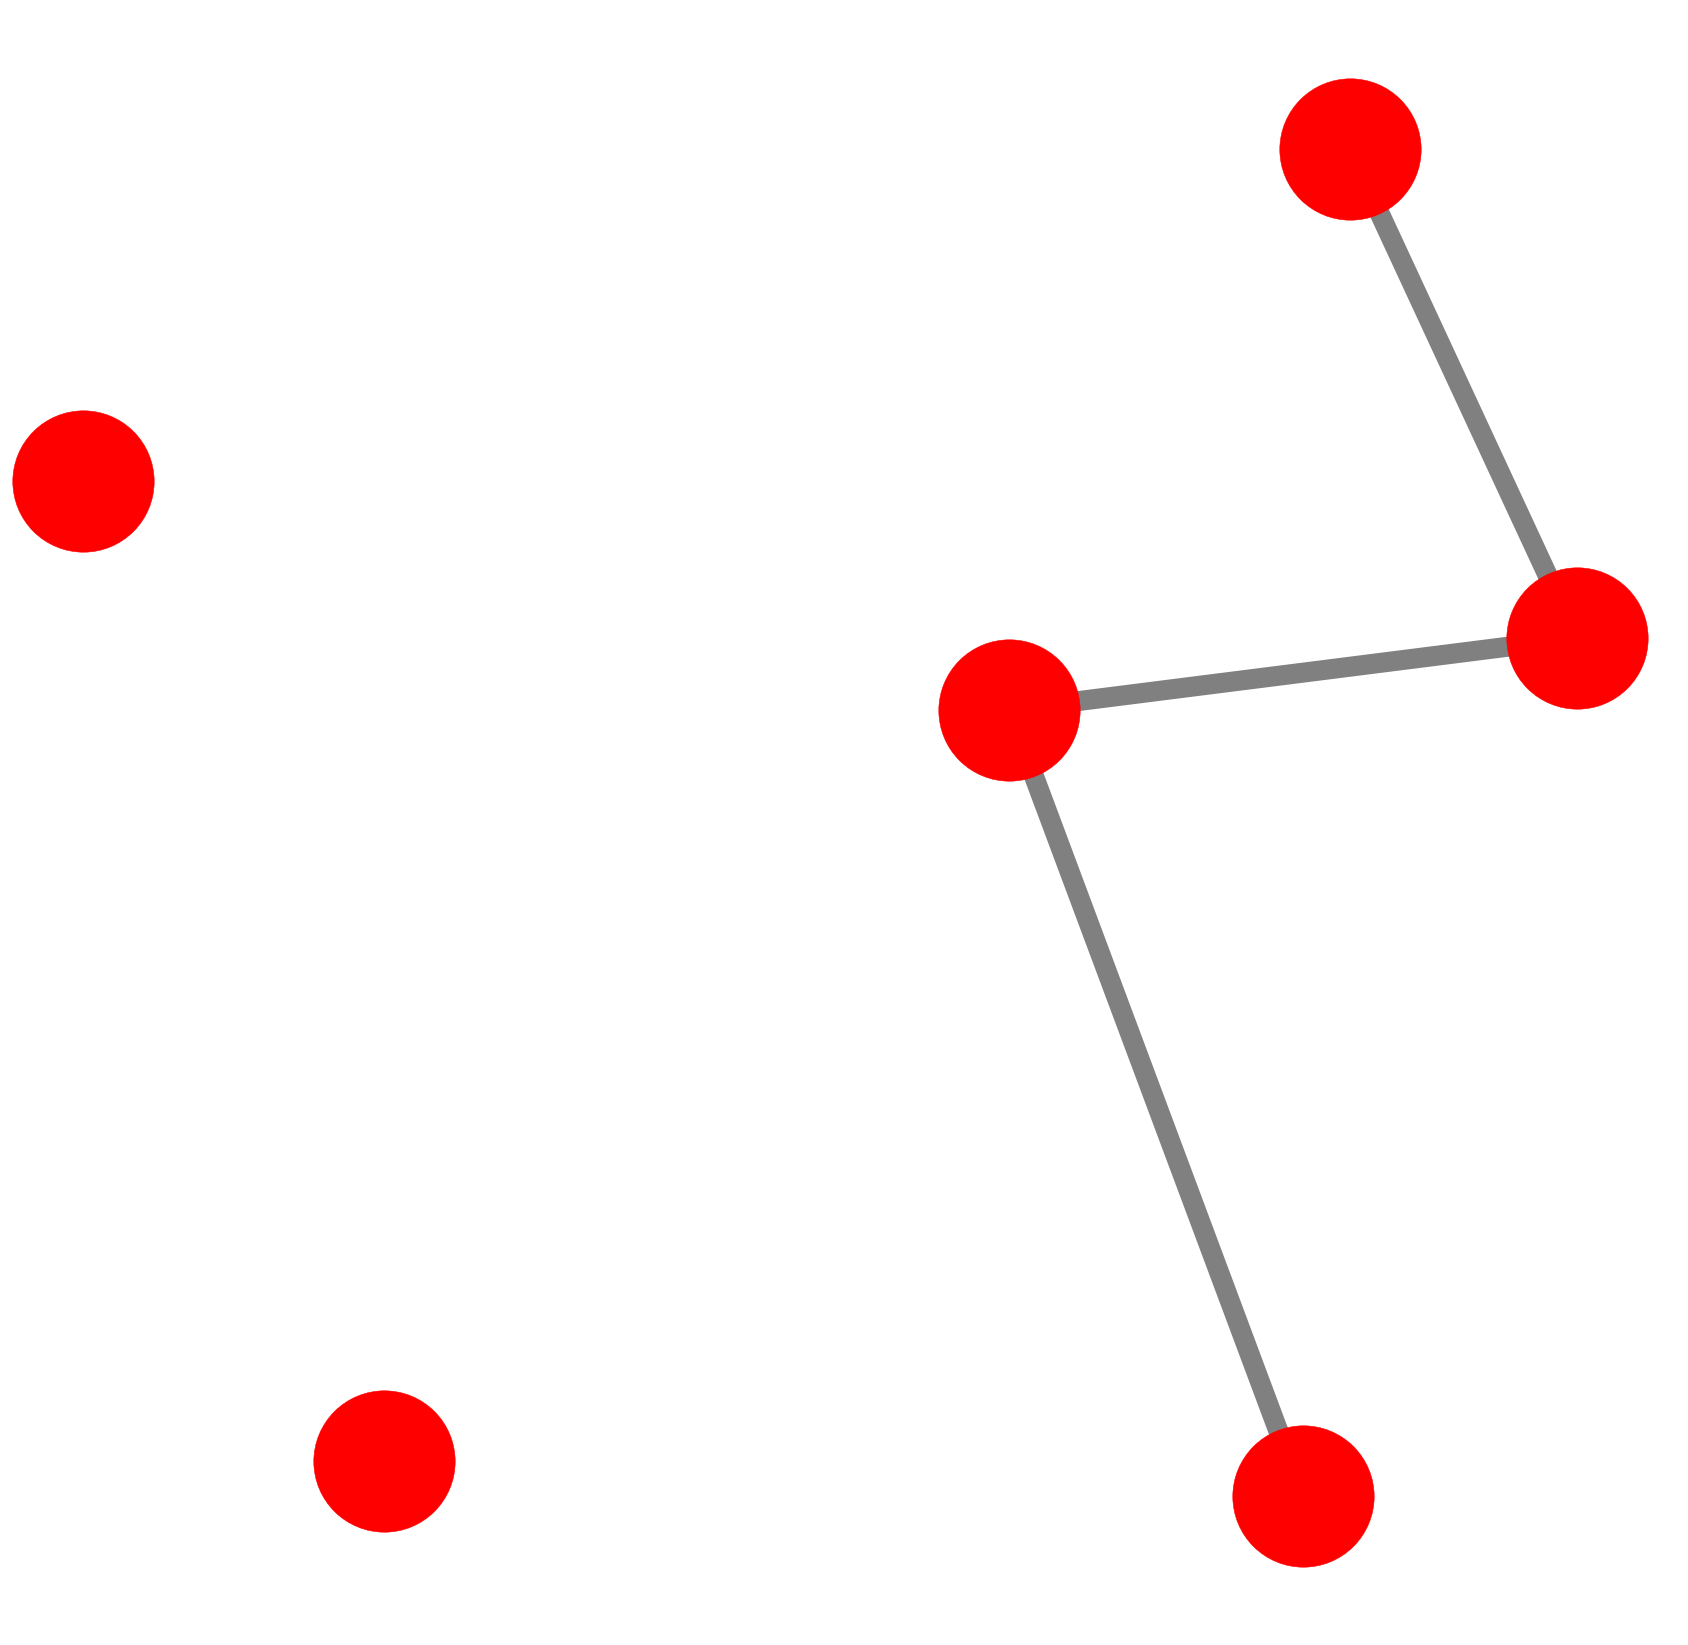

In [36]:
#Let's plot these core networks
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))

G_ppi_bpa_lmh_up_subnetwork=nx.subgraph(G_ppi,overlapping_genes_threeconditions)
size=20000
# E D G E S 
opacity_nodes = 1
edge_color = 'grey'
edge_width = 20
opacity_edges = 1

#size = draw_node_size(backbone_ss_exposure_network_community_subnetwork, degs, node_factor) # node size based on degree
posG_spring = nx.spring_layout(G_ppi_bpa_lmh_up_subnetwork,k=1.8,weight=100,scale=0.5)
nx.draw_networkx_nodes(G_ppi_bpa_lmh_up_subnetwork, pos = posG_spring, linewidths = 0.5, node_color='red', node_size=size, node_shape='o', alpha = opacity_nodes)
nx.draw_networkx_edges(G_ppi_bpa_lmh_up_subnetwork, pos = posG_spring, width = edge_width, edge_color = edge_color, alpha = opacity_edges)
#nx.draw_networkx_labels(G_ppi_bpa_lmh_up_subnetwork,pos=posG_spring,font_size=80)
plt.box(False)
plt.savefig('Federica/Federica_Figures/Fig4A.png',transparent=True)
plt.show() 

In [44]:
def enrichment_from_genelist(gene_list,libraries):   #This function returns the enrichment df for GOBP,GOCC,GOMF,KeGG  
    import gseapy as gp
    enr_df_dict={}
    for l in libraries:
        enr_df = gp.enrichr(gene_list=gene_list,
                             gene_sets=l,
                             organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                             outdir=None, # don't write to disk
                            )
        enr_df_dict[l]=enr_df

    return enr_df_dict

In [496]:
lib_list=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021']

bpa_lmh_core_enr_df=enrichment_from_genelist(['LAMC1','NID2','COL4A1','COL4A2'],lib_list)


/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


In [497]:
bpa_lmh_core_enr_aggdf=pd.concat([v.res2d for v in list(bpa_lmh_core_enr_df.values())], join="inner")

<ipython-input-536-66efe293c048>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)


<Figure size 3000x3000 with 0 Axes>

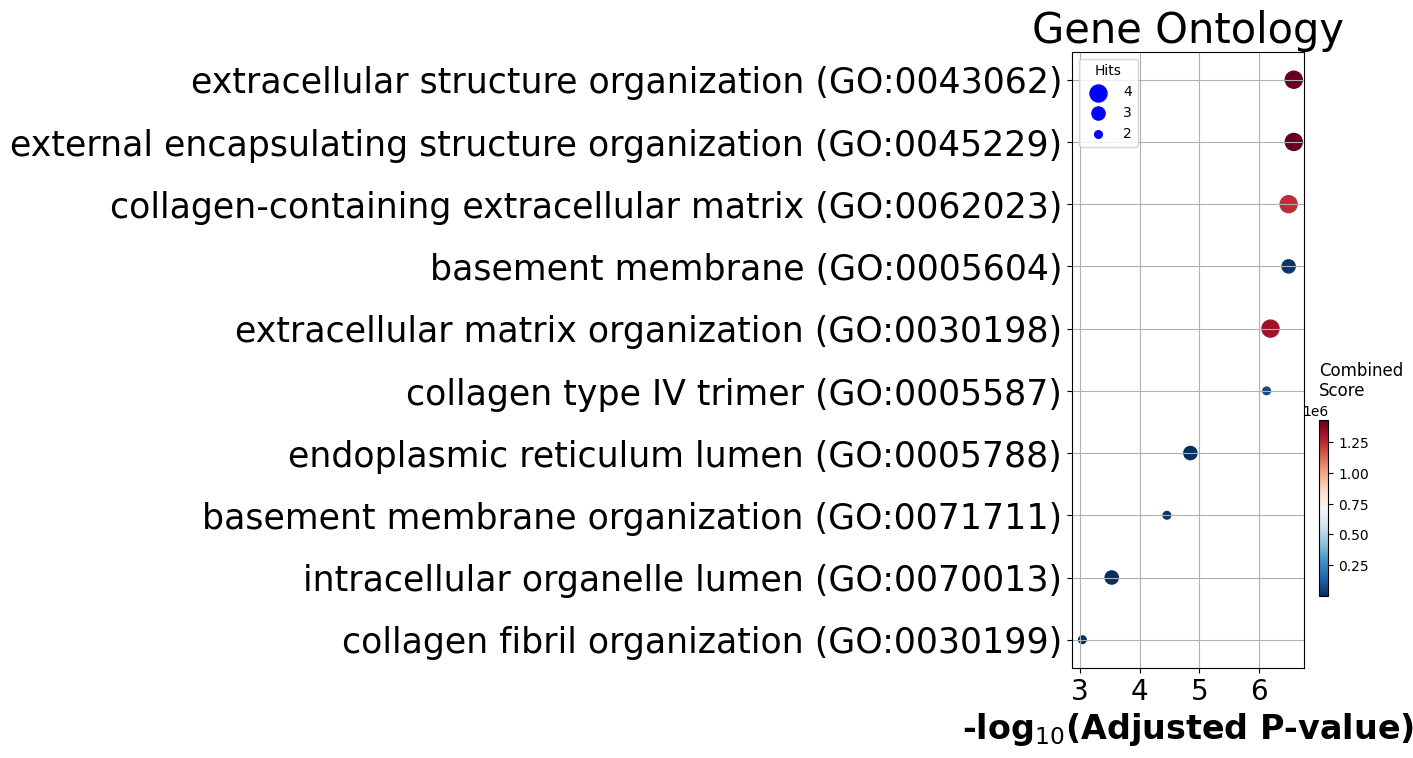

In [536]:
from gseapy import barplot, dotplot
plt.figure(figsize=(30,30))
ax = dotplot(bpa_lmh_core_enr_aggdf,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=15,
              top_term=10,
              figsize=(3,8),
              title = "Gene Ontology",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )
ax.set_yticklabels(ax.get_yticklabels(), fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=24)
ax.set_title("Gene Ontology", fontsize=30)

plt.savefig('Federica/Federica_Figures/BPA_upregulated_core.pdf', bbox_inches="tight", dpi=300)

In [76]:
#We repeat it including the KEGG library here for the Supplementary Table 

lib_list=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021','KEGG_2021_Human']
bpa_lmh_core_enr_df=enrichment_from_genelist(['LAMC1','NID2','COL4A1','COL4A2'],lib_list)
bpa_lmh_core_enr_aggdf=pd.concat([v.res2d for v in list(bpa_lmh_core_enr_df.values())], join="inner")
bpa_lmh_core_enr_aggdf=bpa_lmh_core_enr_aggdf[bpa_lmh_core_enr_aggdf['Adjusted P-value']<0.05]

/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [98]:


lib_list=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021','KEGG_2021_Human']
bpa_lmh_core_enr_df=enrichment_from_genelist(list(set(heart_degs_ppi_dict['heart_deg_h'])),lib_list)
bpa_lmh_core_enr_aggdf=pd.concat([v.res2d for v in list(bpa_lmh_core_enr_df.values())], join="inner")
bpa_lmh_core_enr_aggdf=bpa_lmh_core_enr_aggdf[bpa_lmh_core_enr_aggdf['Adjusted P-value']<0.05]

/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

<Figure size 3000x3000 with 0 Axes>

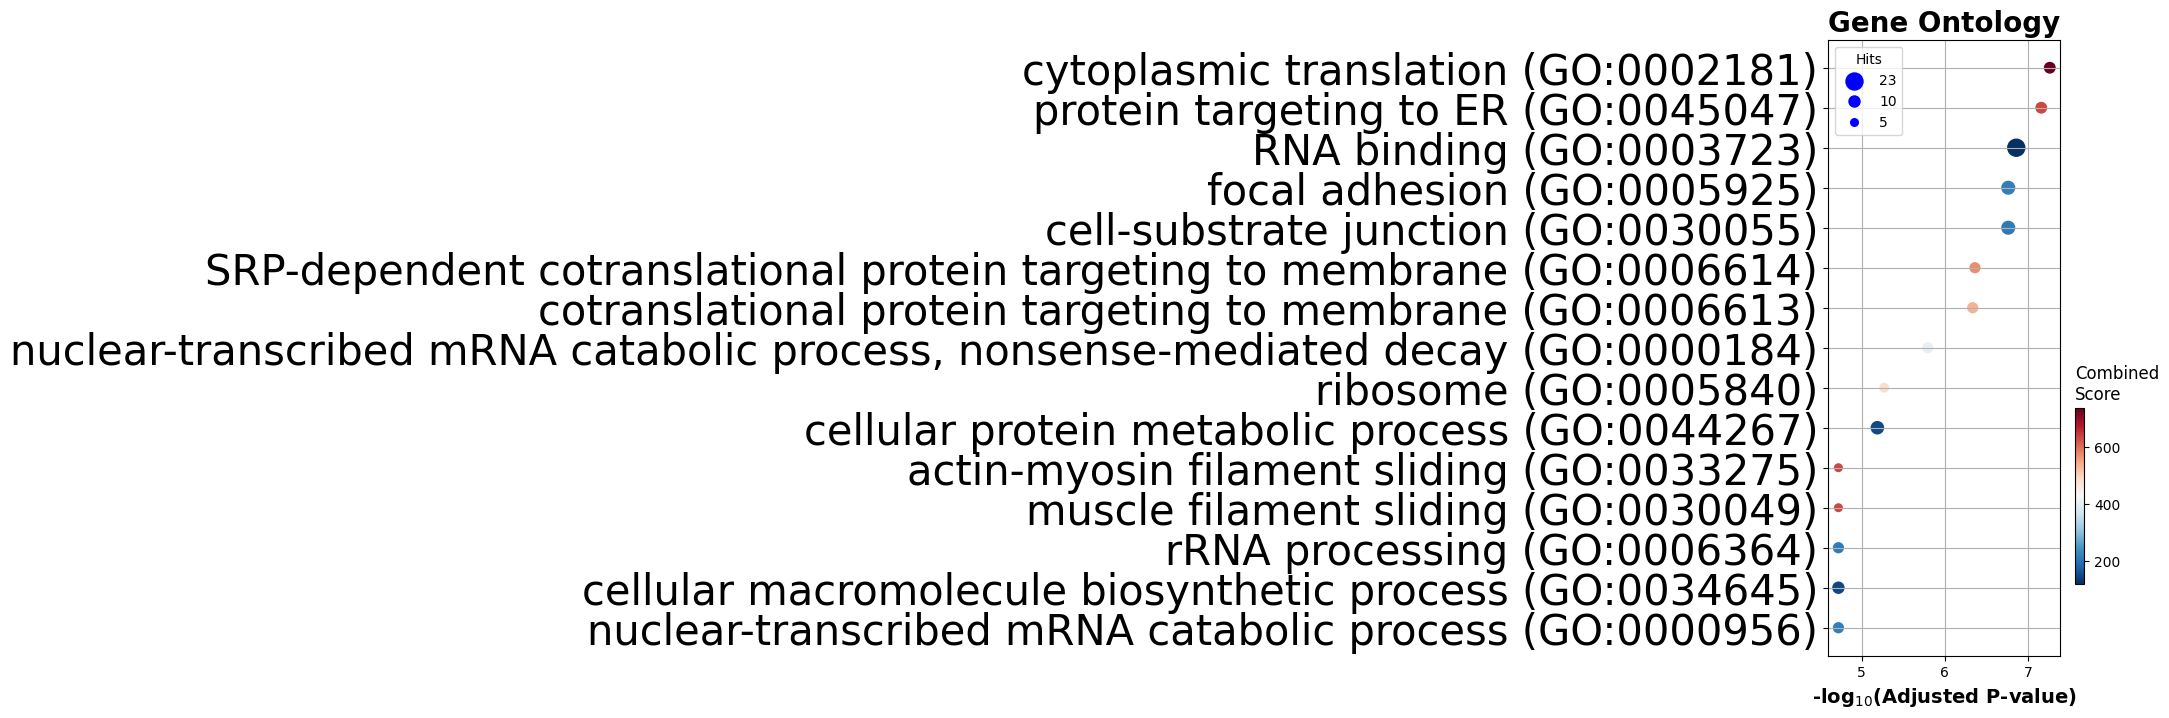

<Figure size 3000x3000 with 0 Axes>

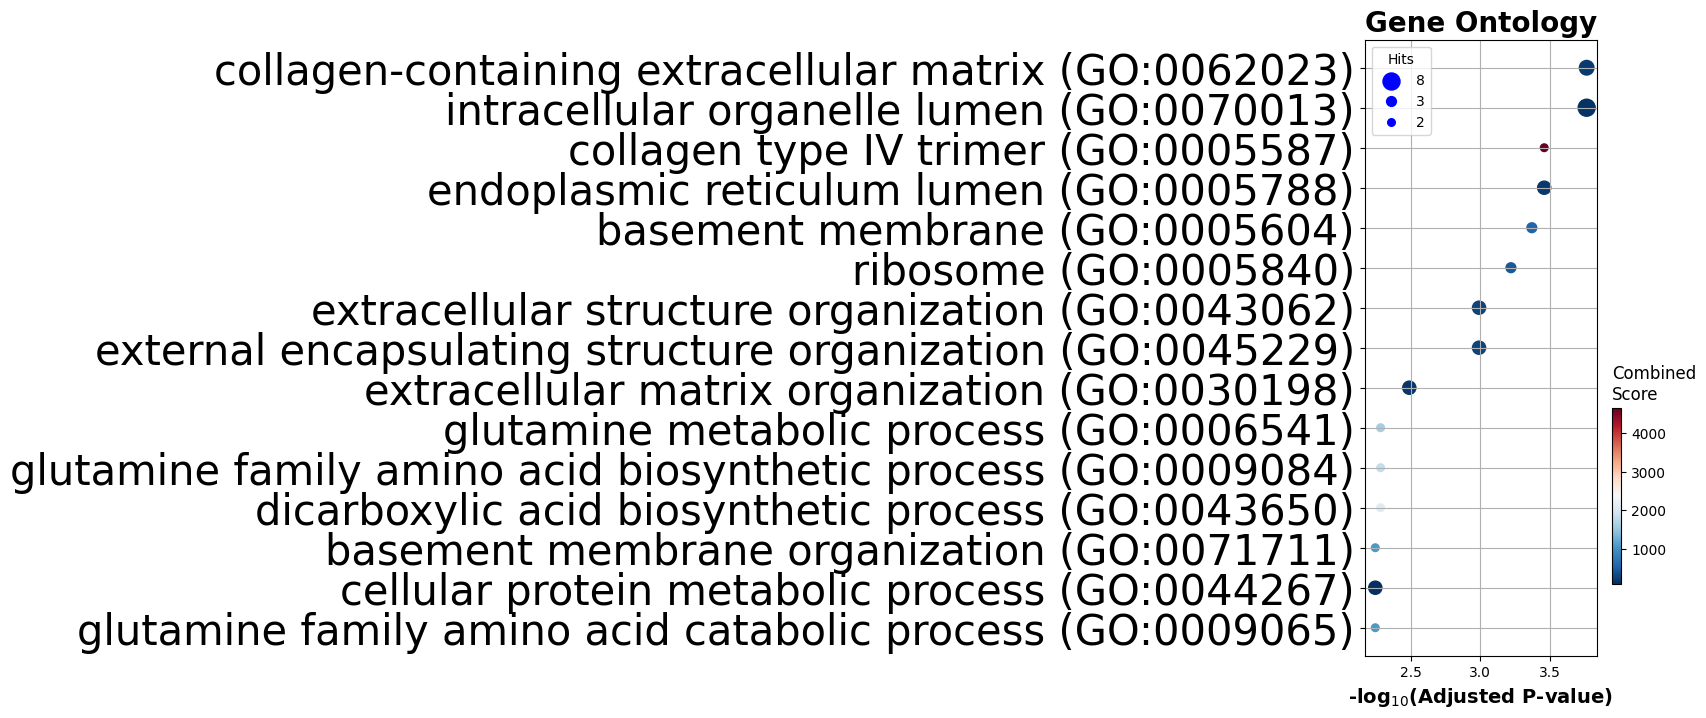

<Figure size 3000x3000 with 0 Axes>

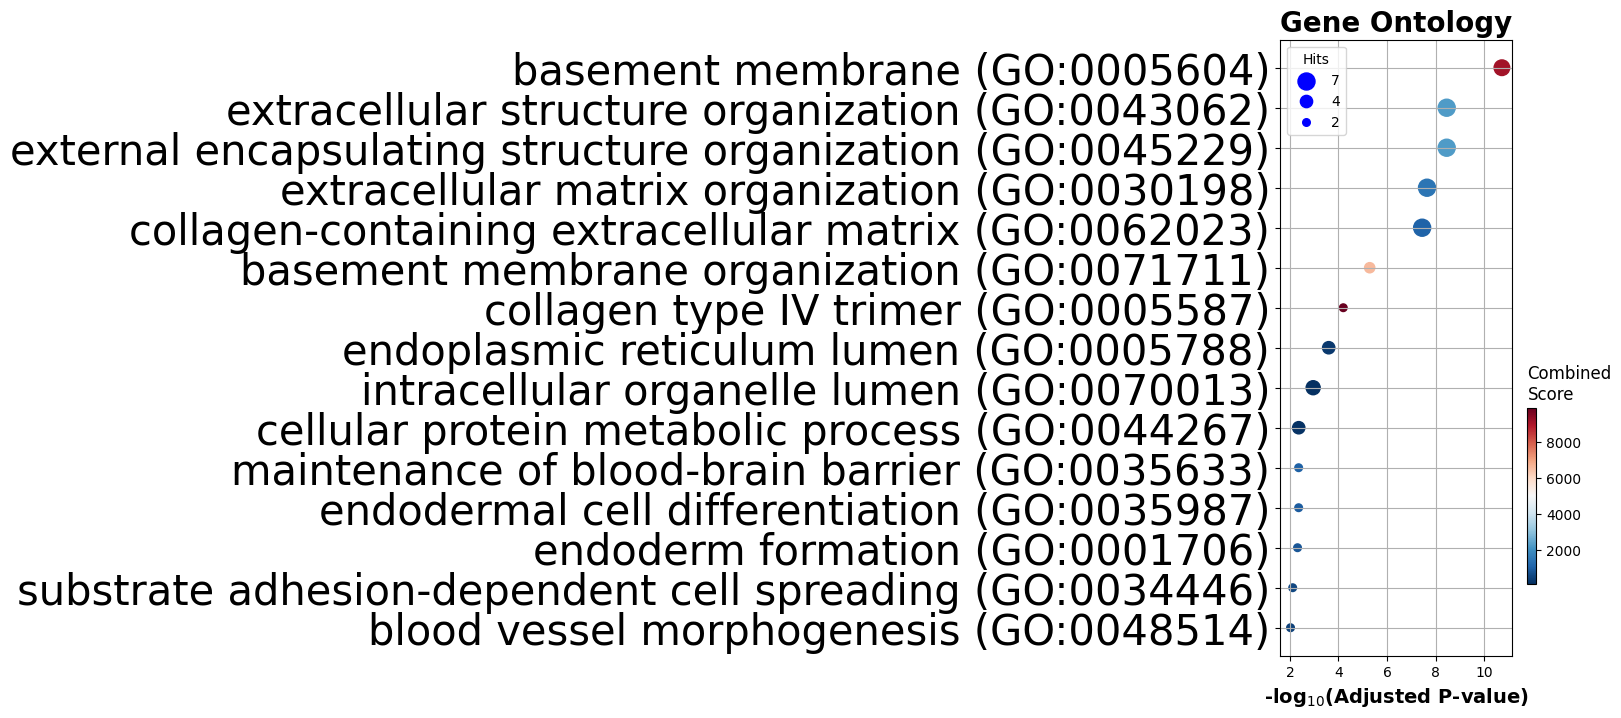

In [495]:
#Let's do it for each group individually (0.01,0.1,1 uM BPA)
lib_list=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021']
group=['heart_deg_l','heart_deg_m','heart_deg_h']
from gseapy import barplot, dotplot
for c in group:
    plt.figure(figsize=(30,30))
    bpa_lmh_core_enr_df=enrichment_from_genelist(list(heart_degs_ppi_dict[c]),lib_list)
    bpa_lmh_core_enr_aggdf=pd.concat([v.res2d for v in list(bpa_lmh_core_enr_df.values())], join="inner")
    
    ax = dotplot(bpa_lmh_core_enr_aggdf,
                  column="Adjusted P-value",
                  x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
                  size=10,
                  top_term=15,
                  figsize=(3,8),
                  title = "Gene Ontology",
                  xticklabels_rot=45, # rotate xtick labels
                  show_ring=True, # set to False to revmove outer ring
                  marker='o',
                 )
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=30)
    plt.savefig('Federica/Federica_Figures/%s.pdf'%c, bbox_inches="tight", dpi=300)

In [157]:
#This function will return the shortest distance between two genesets
def shortest_geneset_connection(network,geneset1,geneset2):
    geneset1_net=set(geneset1)&network.nodes()
    geneset2_net=set(geneset2)&network.nodes()
    shortest_path_len={}
    for gene1 in geneset1_net:
        for gene2 in geneset2_net:
            shortest_path=nx.shortest_path(network,source=gene1, target=gene2)
            shortest_path_key=','.join(shortest_path)
            shortest_path_len[shortest_path_key]=len(shortest_path)
    shortest_path_len_sorted={k: v for k, v in sorted(shortest_path_len.items(), key=lambda item: item[1])}
    return list(shortest_path_len_sorted.keys())[0]

#This function will return the shortest "hubby" distance between two genesets
def hub_preferenttial_geneset_connection(network,geneset1,geneset2):   #here we sort the shortest path based on the avg degree on that path
    geneset1_net=set(geneset1)&network.nodes()
    geneset2_net=set(geneset2)&network.nodes()
    shortest_path_len={}
    for gene1 in geneset1_net:
        for gene2 in geneset2_net:
            shortest_path=nx.shortest_path(network,source=gene1, target=gene2)
            degree_list=[]
            for gene in shortest_path:
                degree_list.append(nx.degree(network,gene))
            shortest_path_key=','.join(shortest_path)
            
            shortest_path_len[shortest_path_key]=np.mean(degree_list)
    shortest_path_len_sorted={k: v for k, v in sorted(shortest_path_len.items(), key=lambda item: item[1], reverse=True)}
    
    return list(shortest_path_len_sorted.keys())[0]

In [107]:
#Let's make a random walk, so that we can contain all the 


#########################################################################
#
#          CALCULATES THE RANDOM WALK OPERATOR 
#             REQUIRES ADJACENCY MATRIX
#
#########################################################################
from sklearn.preprocessing import normalize
def rnd_walk_matrix(A, r, a, num_nodes):
    num = 1*num_nodes
    n = num_nodes
    factor = float((1-a)/n)
    E = np.multiply(factor,np.ones([n,n])) 
    A_tele = np.multiply(a,A) + E  
#     print(A_tele)
    M = normalize(np.asarray(A_tele), norm='l1', axis=0)                                 # column wise normalized MArkov matrix
    del A
    del A_tele
    del E
    U = np.identity(n,dtype=int) 
    H = (1-r)*M
    H1 = np.subtract(U,H)
    del U
    del M
    del H    
    W = r*np.linalg.inv(H1)   
    return W



# RANDOM WALK PARAMETERS
r = .9
alpha = 1.


# ###########################################################################
#                                                                           #
#    CALCULATES MATRIX INVERSION FOR GIVEN PARAMETERS                       #
#                                                                           #
                                                                            #
num_nodes = G_ppi.number_of_nodes()                                             #
A = nx.adjacency_matrix(G_ppi)                                #
                                                                            #
#################################################################           #
#                                                                           #
#    INVERT MARKOV MATRIX & GENERATE RW MATRIX                              #
#                                                                           #
###################                                                         #
                                                                            #
W = rnd_walk_matrix(A, r, alpha, num_nodes)                                 #
                                                                            #
print('Inversion done')                                                     #
#################################################################           #
#                                                                           #
#    GENERATE DICT FOR NODE-LABELS TO INTEGERS                              #
#                                                                           #
###################                             
d_idx_sym = {}                                                              
cc = 0                                                                      
for sym in G_ppi.nodes():                                              
    d_idx_sym[cc] = sym                                                   
    cc += 1                                                                 
d_sym_idx = dict((y,x) for x,y in d_idx_sym.items()) 

<ipython-input-107-0da358ae910d>:44: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G_ppi)                                #


Inversion done


In [106]:
#Let's import the heart specific proteins from HPA
#https://www.proteinatlas.org/search/tissue_category_rna%3Aheart+muscle%3BTissue+enriched%2CGroup+enriched%2CTissue+enhanced+AND+show_columns%3Atissuespecificity+AND+sort_by%3Atissue+specific+score

heart_specific_proteins=pd.read_csv("input/tissue_category_rna_heart.tsv",sep="\t")["Gene"].tolist()


In [108]:
core_up=['COL4A2', 'COL4A1', 'NID2', 'LAMC1']
heart_sep=['TNNC1','SERBP1']
intersected_heart_dysregulated_list=core_up+heart_sep
nodeset = []
for s_ent in intersected_heart_dysregulated_list:
    nodeset.append(d_sym_idx[s_ent])
normprob = len(nodeset)
print('Size of initial set for %s seed genes' %normprob)
p0 = np.zeros(G_ppi.number_of_nodes())
# generate start vector
for n in range(len(p0)):
    if n in nodeset:
        p0[n] = 1.
pinf =  np.array(W.dot(p0))
# DICT WITH NODE ID AND PVIS 
d_n_p = {}
i = 0
for x in pinf:
#     print(i,x)
    d_n_p[d_idx_sym[i]] = x/normprob
    i += 1  
pcum = 0
l_rndwnodes = []
cc = 0
for node, pvis in sorted(d_n_p.items(), key = lambda x: x[1], reverse = True):
    pcum += pvis
    if node in set(heart_specific_proteins) or node in set(full_unionlist_allconditions):
        l_rndwnodes.append(node)
    unified_core = G_ppi.subgraph(l_rndwnodes)  
    if nx.is_connected(unified_core) and cc>len(nodeset):
        break
    cc += 1

Size of initial set for 6 seed genes


In [109]:
unified_core.number_of_nodes()

24

In [110]:
unified_core_color_dict={}
for node in unified_core.nodes():
    if node in intersected_heart_dysregulated_list:
        unified_core_color_dict[node]='red'
    elif node in twocondition_genes:
        unified_core_color_dict[node]='orangered'
    elif node in full_unionlist_allconditions:
        unified_core_color_dict[node]='darkorange'
    else:
        unified_core_color_dict[node]='greenyellow'

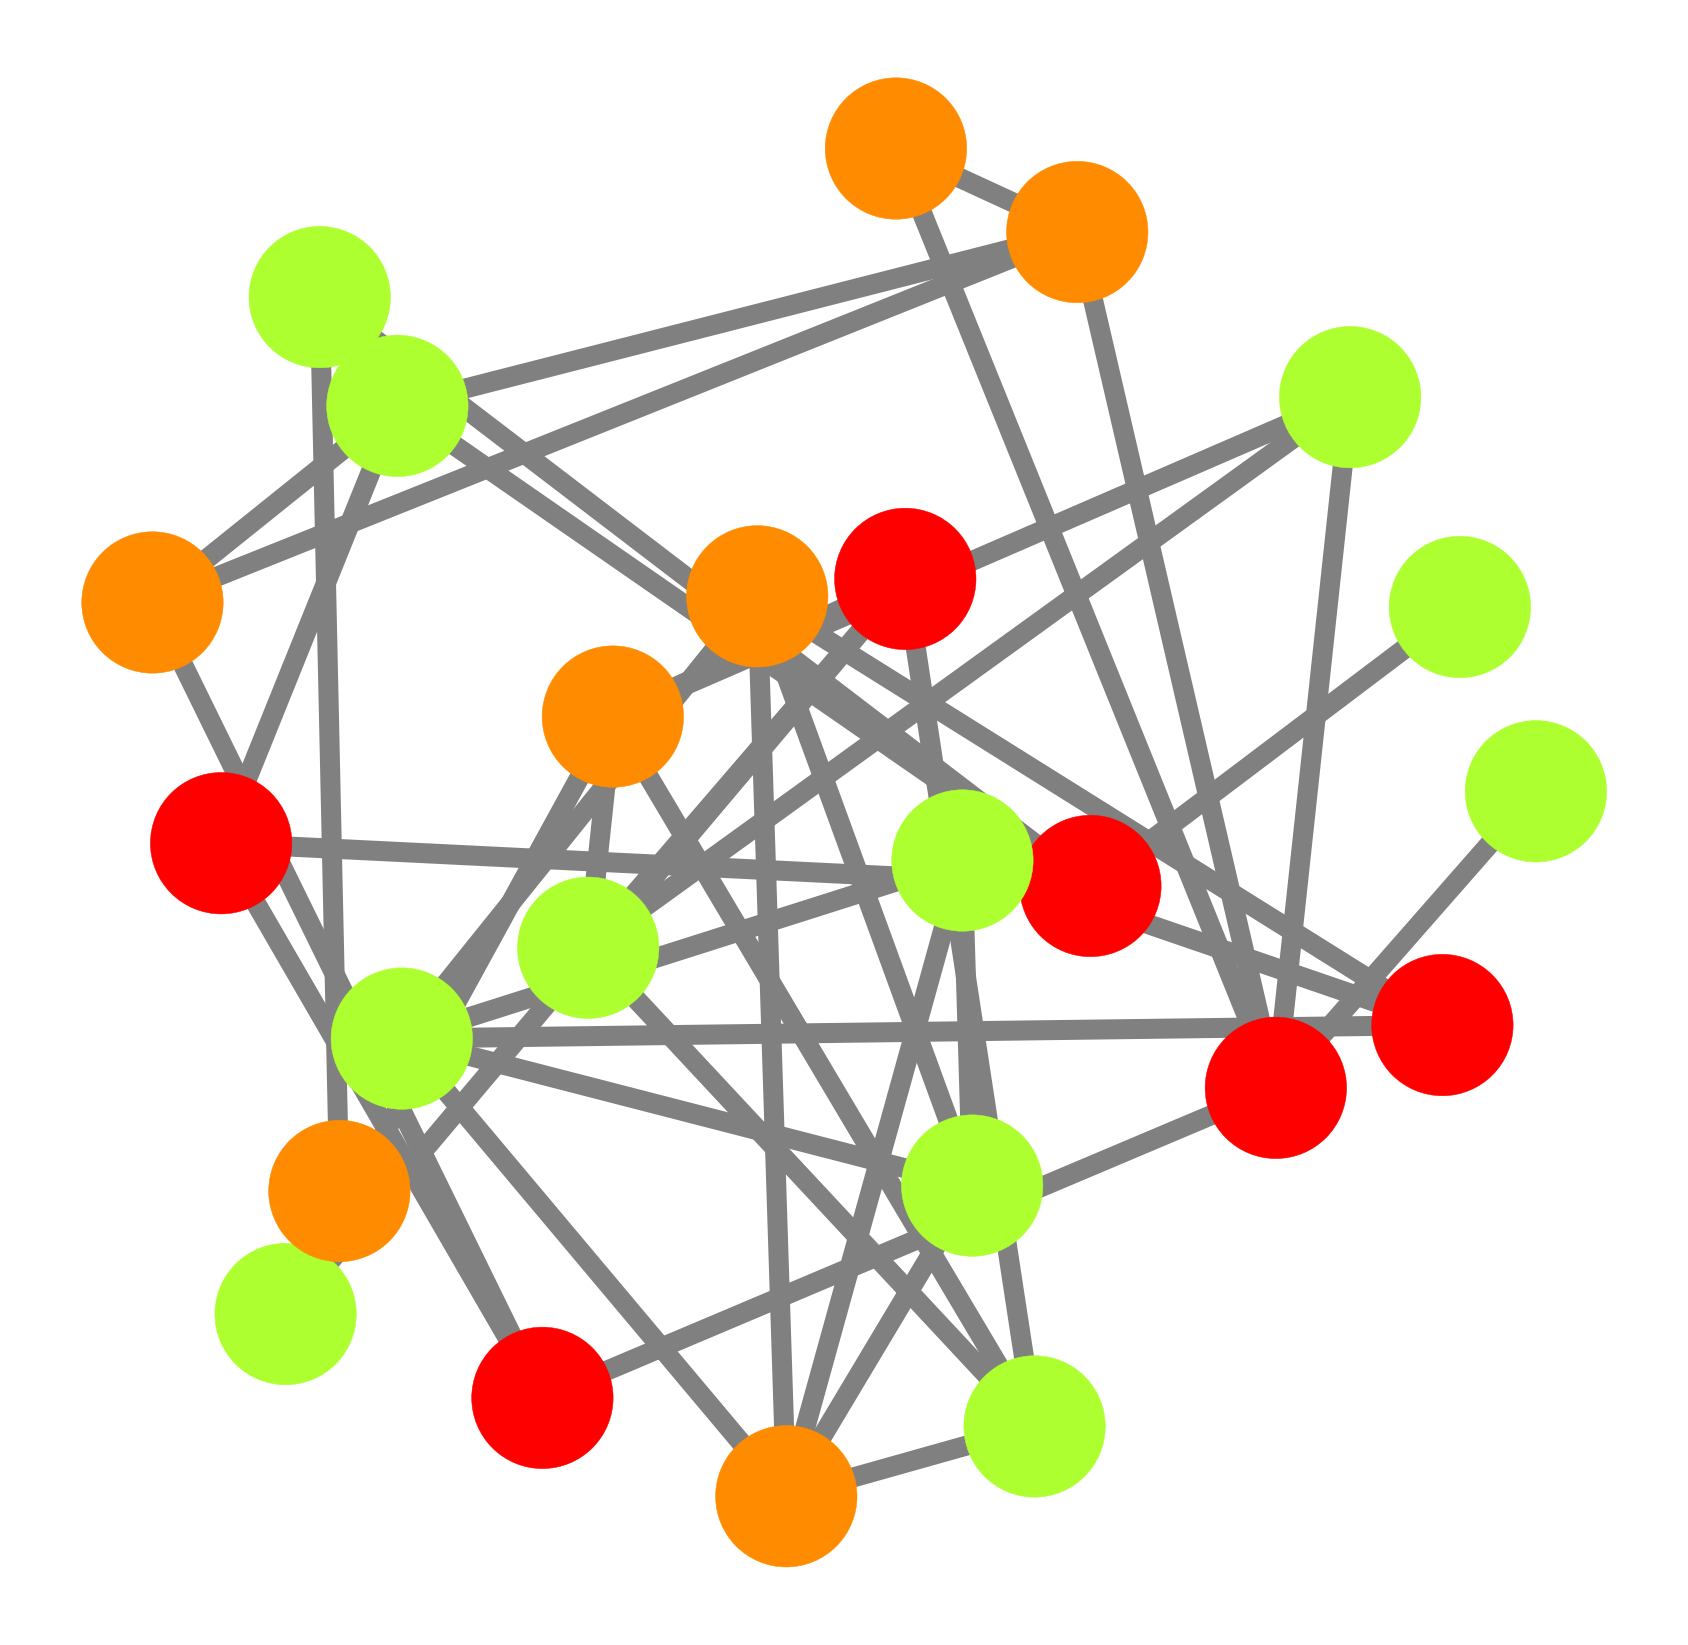

In [113]:
#Let's plot these core networks
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))


size=20000
# E D G E S 
opacity_nodes = 1
edge_color = 'grey'
edge_width = 20
opacity_edges = 1

posG_spring = nx.spring_layout(unified_core,k=1.8,weight=100,scale=0.5)
color_val=[]
for node in posG_spring:
    color_val.append(unified_core_color_dict[node])
nx.draw_networkx_nodes(unified_core, pos = posG_spring, linewidths = 0.5, node_color=color_val, node_size=size, node_shape='o', alpha = opacity_nodes)
nx.draw_networkx_edges(unified_core, pos = posG_spring, width = edge_width, edge_color = edge_color, alpha = opacity_edges)
#nx.draw_networkx_labels(unified_core,pos=posG_spring,font_size=80)
plt.box(False)
plt.savefig('Federica/Federica_Figures/Fig4C.png',transparent=True)
plt.show() 

In [529]:
lib_list=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021']
bpa_unified_core_enr_df=enrichment_from_genelist(list(unified_core.nodes()),lib_list)
bpa_unified_core_enr_aggdf=pd.concat([v.res2d for v in list(bpa_unified_core_enr_df.values())], join="inner")
bpa_unified_core_enr_aggdf=bpa_unified_core_enr_aggdf[bpa_unified_core_enr_aggdf['Adjusted P-value']<0.05]

/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


<ipython-input-535-cf8cfce281ca>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)


<Figure size 3000x3000 with 0 Axes>

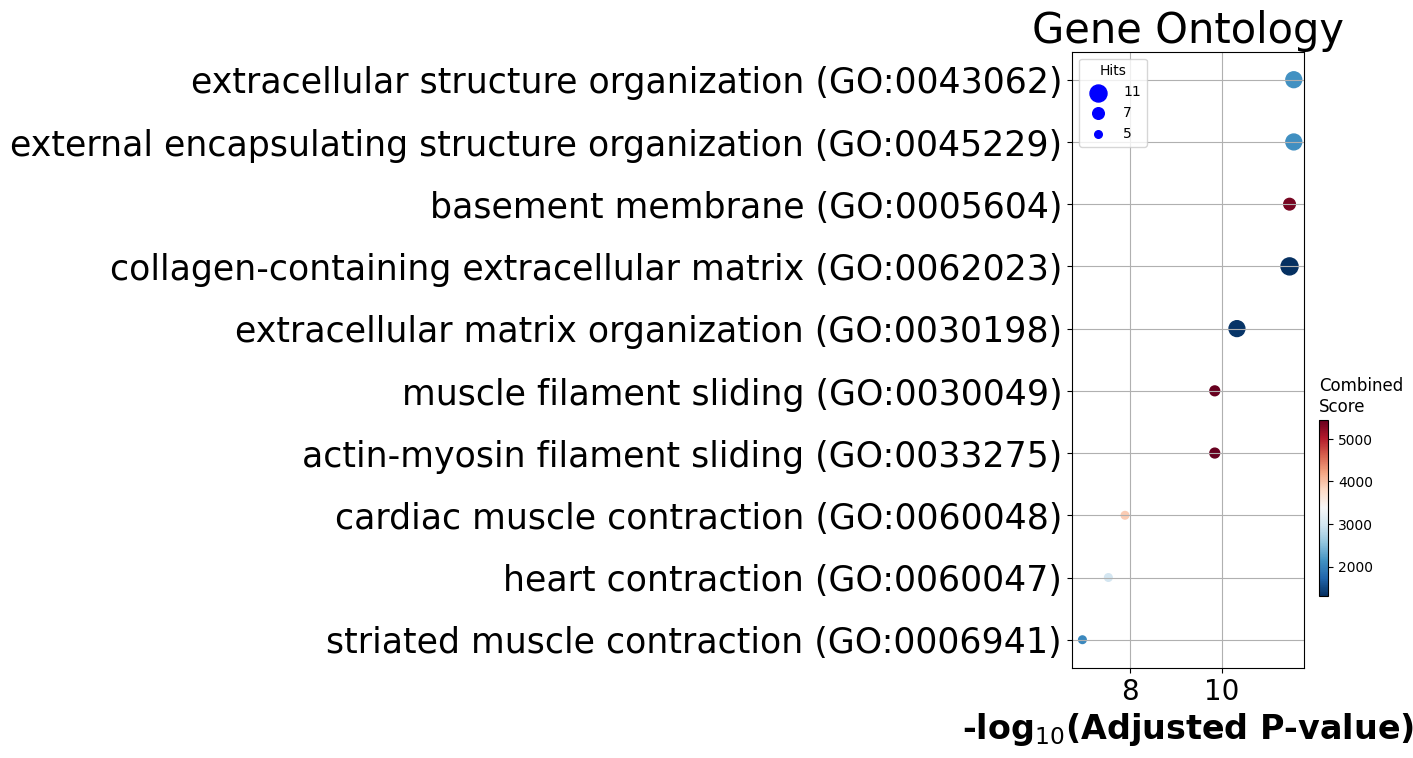

In [535]:

from gseapy import barplot, dotplot
plt.figure(figsize=(30,30))
ax = dotplot(bpa_unified_core_enr_aggdf,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=15,
              top_term=10,
              figsize=(3,8),
              title = "Gene Ontology",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )
ax.set_yticklabels(ax.get_yticklabels(), fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=24)
ax.set_title("Gene Ontology", fontsize=30)

plt.savefig('Federica/Federica_Figures/bpa_unified_core_enr_aggdf.pdf', bbox_inches="tight", dpi=300)

In [132]:
#Let's repeat the analyses including KEGG
lib_list=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021','KEGG_2021_Human']
bpa_unified_core_enr_df=enrichment_from_genelist(list(unified_core.nodes()),lib_list)
bpa_unified_core_enr_aggdf=pd.concat([v.res2d for v in list(bpa_unified_core_enr_df.values())], join="inner")
bpa_unified_core_enr_aggdf=bpa_unified_core_enr_aggdf[bpa_unified_core_enr_aggdf['Adjusted P-value']<0.05]

/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [111]:

file = open('output/Unifiedcoreheart.txt','w')
for protein in list(G_deg_condition_copy.nodes()):
    file.write(protein+"\n")
file.close()

In [141]:
with open('output/Unifiedcoreheart.txt') as f:
    Unifiedcoreheart_list = f.read().splitlines()

In [51]:
#Here we import the set of curated diseases from Disgenet
# Let's import a set of gene-disease associations well-curated
# using the API from https://www.disgenet.org/home/

disgenet_disease_associations_df=pd.read_csv("input/disease_associations.tsv",sep="\t")
disease_id_set=set(disgenet_disease_associations_df['diseaseId'].tolist())

disgenet_gda_curated_score={}
import requests

#Build a dict with the following format, change the value of the two keys your DisGeNET account credentials, if you don't have an account you can create one here https://www.disgenet.org/signup/ 
auth_params = {"email":"slombardo@cemm.at","password":"bioismess"}

api_host = "https://www.disgenet.org/api"

api_key = None
s = requests.Session()
try:
    r = s.post(api_host+'/auth/', data=auth_params)
    if(r.status_code == 200):
        #Lets store the api key in a new variable and use it again in new requests
        json_response = r.json()
        api_key = json_response.get("token")
        print(api_key + "This is your user API key.") #Comment this line if you don't want your API key to show up in the terminal
    else:
        print(r.status_code)
        print(r.text)
except requests.exceptions.RequestException as req_ex:
    print(req_ex)
    print("Something went wrong with the request.")

if api_key:
    #Add the api key to the requests headers of the requests Session object in order to use the restricted endpoints.
    s.headers.update({"Authorization": "Bearer %s" % api_key}) 
    for dis in disease_id_set:
        try:
            try:
                gda_response = s.get(api_host+'/gda/disease/%s'%dis, params={'source':'CURATED','min_score':0.5,'limit':5000})
                genelist=[]
                for i in range(len(gda_response.json())):
                    genelist.append(gda_response.json()[i]['gene_symbol'])
                disgenet_gda_curated_score[dis]=genelist
            except:
                gda_response = s.get(api_host+'/gda/disease/%s'%dis, params={'source':'CURATED','min_score':0.3,'limit':5000})
                genelist=[]
                for i in range(len(gda_response.json())):
                    genelist.append(gda_response.json()[i]['gene_symbol'])
                disgenet_gda_curated_score[dis]=genelist
        except:
            pass
        
with open('input/disgenet_gda_curated_score.pickle', 'wb') as handle:
    pk.dump(disgenet_gda_curated_score, handle, protocol=pk.HIGHEST_PROTOCOL)
    
#Here we import the set of curated diseases from Disgenet
with open('input/disgenet_gda_curated_score.pickle', 'rb') as handle:
    disgenet_gda_curated_score = pk.load(handle)
    
    
    
disgenet_disease_associations_df=pd.read_csv("input/disease_associations.tsv",sep="\t")disgenet_gda_curated_score_name={}
for dis_id,geneset in disgenet_gda_curated_score.items():
    disgenet_gda_curated_score_name[disgenet_disease_associations_df[disgenet_disease_associations_df['diseaseId']==dis_id]['diseaseName'].values[0]]=geneset
  

In [144]:
#Let's predict the disease relationships with the intersected list based on the Jaccard index

heart_unified_module_overlap_fdr_dict={}

genebackground=G_ppi_lcc.number_of_nodes()

overlapped_disease_dict={}
for dis,geneset in disgenet_gda_curated_score_name.items():
    dis_genes_geneset=set(geneset)
    pval=overlap_genelists(Unifiedcoreheart_list,dis_genes_geneset,G_ppi.number_of_nodes())
    overlapped_disease_dict[dis]=float(pval)

adj_pvals=fdr_adjustment(list(overlapped_disease_dict.values()),alpha=0.05)
dis_keys_list=list(overlapped_disease_dict.keys())
overlapped_disease_pval_adj={}
for el in range(len(dis_keys_list)):
    overlapped_disease_pval_adj[dis_keys_list[el]]=adj_pvals[el]

for k,v in overlapped_disease_pval_adj.items():
    if v<0.05:
        heart_unified_module_overlap_fdr_dict[k]=v
    else:
        pass
heart_unified_module_overlap_fdr_dict_sorted=dict(sorted(heart_unified_module_overlap_fdr_dict.items(), key=lambda item: item[1]))


In [145]:
heart_unified_module_overlap_fdr_dict_sorted

{'Hypertrophic Cardiomyopathy': 5.318130946626812e-05,
 'Cardiomyopathy, Hypertrophic, Familial': 0.0001010286818400429,
 'Obstructive asymmetric septal hypertrophy': 0.00017650428162827554,
 'Idiopathic hypertrophic subaortic stenosis': 0.00017650428162827554,
 'PORENCEPHALY, FAMILIAL': 0.002884604763795208,
 'Developmental Porencephaly': 0.002884604763795208,
 'Other restrictive cardiomyopathy': 0.024667404626811808}

# Proximity

In [ ]:
#First, we will run the proximity algorithm in the general PPI

In [43]:
#Just the DEGs

#We have used the heart_degs_ppi_dict including their core when interesting


heart_degs_ppi_and_core_components_dict={}
for cond,geneset in heart_degs_ppi_dict.items():
    heart_degs_ppi_and_core_components_dict[cond]=geneset


heart_up_low_core_genelist=G_up_low_copy_lcc.nodes()
heart_up_medium_core1_genelist=G_up_medium_copy_lcc.nodes()
heart_up_medium_core2_genelist=['COL4A2', 'COL4A1', 'NID2', 'LAMC1']
heart_up_high_core_genelist=list(G_up_high_copy_lcc.nodes())

heart_degs_ppi_and_core_components_dict['Up_low_core']=heart_up_low_core_genelist
heart_degs_ppi_and_core_components_dict['Up_medium_core1']=heart_up_medium_core1_genelist
heart_degs_ppi_and_core_components_dict['Up_medium_core2']=heart_up_medium_core2_genelist
heart_degs_ppi_and_core_components_dict['Up_high_core']=heart_up_high_core_genelist

NameError: name 'G_up_low_copy_lcc' is not defined

In [303]:
with open('output/heart_degs_ppi_and_core_components_dict.pickle', 'wb') as handle:
    pk.dump(heart_degs_ppi_and_core_components_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

In [ ]:
#These analyses are run using the script heart_bpa_degs_and_core_Gppi_proximity.py and heart_unifiedcore_proximity.py

In [40]:
#Let's import the analyses
with open('output/heart_degs_ppi_and_core_components_proximity.pickle', 'rb') as handle:
    heart_degs_ppi_and_core_components_proximity = pk.load(handle)

In [41]:
#Let's import the analyses
with open('output/heart_unifiedcore_proximity.pickle', 'rb') as handle:
    heart_unifiedcore_proximity = pk.load(handle)

In [146]:
import scipy


#Let's convert these proximity values to p-values


heart_unifiedcore_proximity_pval={}

dis_list=[]
pval_list=[]
for cond_dis_pair,prox_dict in heart_unifiedcore_proximity.items():
    dis_list.append(cond_dis_pair[1])
    pval_list.append(scipy.stats.norm.sf(abs(prox_dict[1])))

for r in range(len(dis_list)):
    heart_unifiedcore_proximity_pval[dis_list[r]]=pval_list[r]

In [147]:


from statsmodels.stats.multitest import multipletests                         #here, we apply a FDR adjustment on the p-values calculated
def fdr_adjustment(list_of_pvals):                       
    return stat.multitest.fdrcorrection(list_of_pvals)[1] 

heart_unifiedcore_proximity_fdr_significant={}
heart_unifiedcore_proximity_fdr={}

adj_pvals=fdr_adjustment(list(heart_unifiedcore_proximity_pval.values()))
dis_list=list(heart_unifiedcore_proximity_pval.keys())

for el in range(len(adj_pvals)):
    heart_unifiedcore_proximity_fdr[dis_list[el]]=adj_pvals[el]

for k,v in heart_unifiedcore_proximity_fdr.items():
    if v<0.05:
        heart_unifiedcore_proximity_fdr_significant[k]=v
    else:
        pass


In [148]:

heart_unifiedcore_proximity_fdr_significant_dis_names={}

for dis_id, pval in heart_unifiedcore_proximity_fdr_significant.items():
    heart_unifiedcore_proximity_fdr_significant_dis_names[disgenet_disease_associations_df[disgenet_disease_associations_df['diseaseId']==dis_id]['diseaseName'].values[0]]=pval
   


In [149]:
heart_unifiedcore_proximity_fdr_significant_dis_names_sort=dict(sorted(heart_unifiedcore_proximity_fdr_significant_dis_names.items(), key=lambda item: item[1]))




In [150]:
len(heart_unifiedcore_proximity_fdr_significant_dis_names_sort)

1806

In [296]:
        
acs_disease_genes=[]
for gene in disgenet_gda_curated_score_name['Acute Coronary Syndrome']:
    if gene not in acs_disease_genes:
        acs_disease_genes.append(gene)

for gene in disgenet_gda_curated_score_name['Myocardial Infarction']:
    if gene not in acs_disease_genes:
        acs_disease_genes.append(gene)
        
for gene in disgenet_gda_curated_score_name['Coronary heart disease']:
    if gene not in acs_disease_genes:
        acs_disease_genes.append(gene)

for gene in disgenet_gda_curated_score_name['Myocardial Ischemia']:
    if gene not in acs_disease_genes:
        acs_disease_genes.append(gene)  

print(len(acs_disease_genes))





71


In [272]:
        
hf_disease_genes=[]
for gene in disgenet_gda_curated_score_name['Heart Failure, Right-Sided']:
    if gene not in hf_disease_genes:
        hf_disease_genes.append(gene)

for gene in disgenet_gda_curated_score_name['Heart Decompensation']:
    if gene not in hf_disease_genes:
        hf_disease_genes.append(gene)
        
for gene in disgenet_gda_curated_score_name['Myocardial Failure']:
    if gene not in hf_disease_genes:
        hf_disease_genes.append(gene)

for gene in disgenet_gda_curated_score_name['Left-Sided Heart Failure']:
    if gene not in hf_disease_genes:
        hf_disease_genes.append(gene)  
for gene in disgenet_gda_curated_score_name['Left ventricular noncompaction']:
    if gene not in hf_disease_genes:
        hf_disease_genes.append(gene)  
        
for gene in disgenet_gda_curated_score_name['Heart Failure, Diastolic']:
    if gene not in hf_disease_genes:
        hf_disease_genes.append(gene)  
        
for gene in disgenet_gda_curated_score_name['Congestive heart failure']:
    if gene not in hf_disease_genes:
        hf_disease_genes.append(gene)  
        
for gene in disgenet_gda_curated_score_name['Heart failure']:
    if gene not in hf_disease_genes:
        hf_disease_genes.append(gene)  
print(len(hf_disease_genes))



154


In [273]:
        
cm_disease_genes=[]
for gene in disgenet_gda_curated_score_name['Hypertrophic obstructive cardiomyopathy']:
    if gene not in cm_disease_genes:
        cm_disease_genes.append(gene)

for gene in disgenet_gda_curated_score_name['Hypertrophic Cardiomyopathy']:
    if gene not in cm_disease_genes:
        cm_disease_genes.append(gene)
        
for gene in disgenet_gda_curated_score_name['Cardiac Hypertrophy']:
    if gene not in cm_disease_genes:
        cm_disease_genes.append(gene)

for gene in disgenet_gda_curated_score_name['Obstructive asymmetric septal hypertrophy']:
    if gene not in cm_disease_genes:
        cm_disease_genes.append(gene)  
for gene in disgenet_gda_curated_score_name['Idiopathic hypertrophic subaortic stenosis']:
    if gene not in cm_disease_genes:
        cm_disease_genes.append(gene)  
        
for gene in disgenet_gda_curated_score_name['Cardiomyopathy, Hypertrophic, Familial']:
    if gene not in cm_disease_genes:
        cm_disease_genes.append(gene)  
        
for gene in disgenet_gda_curated_score_name['Cardiomyopathies']:
    if gene not in cm_disease_genes:
        cm_disease_genes.append(gene)  
        
for gene in disgenet_gda_curated_score_name['Cardiomyopathy, Dilated']:
    if gene not in cm_disease_genes:
        cm_disease_genes.append(gene)  
        
for gene in disgenet_gda_curated_score_name['Other restrictive cardiomyopathy']:
    if gene not in cm_disease_genes:
        cm_disease_genes.append(gene)  
        
print(len(cm_disease_genes))

133


In [274]:
        
hyp_disease_genes=[]
for gene in disgenet_gda_curated_score_name['Hypertensive disease']:
    if gene not in hyp_disease_genes:
        hyp_disease_genes.append(gene)

for gene in disgenet_gda_curated_score_name['Left Ventricle Remodeling']:
    if gene not in hyp_disease_genes:
        hyp_disease_genes.append(gene)
        
print(len(hyp_disease_genes))

109


In [275]:
ao_disease_genes=[]
for gene in disgenet_gda_curated_score_name['Familial thoracic aortic aneurysm and aortic dissection']:
    if gene not in ao_disease_genes:
        ao_disease_genes.append(gene)

for gene in disgenet_gda_curated_score_name['Aortic Diseases']:
    if gene not in ao_disease_genes:
        ao_disease_genes.append(gene)
        
for gene in disgenet_gda_curated_score_name['Aortic Aneurysm, Thoracoabdominal']:
    if gene not in ao_disease_genes:
        ao_disease_genes.append(gene)

for gene in disgenet_gda_curated_score_name['Aortic Aneurysm, Abdominal']:
    if gene not in ao_disease_genes:
        ao_disease_genes.append(gene)  

        
print(len(ao_disease_genes))

33


In [276]:
sud_disease_genes=[]
for gene in disgenet_gda_curated_score_name['Sudden Cardiac Death']:
    if gene not in sud_disease_genes:
        sud_disease_genes.append(gene)

for gene in disgenet_gda_curated_score_name['Sudden Cardiac Arrest']:
    if gene not in sud_disease_genes:
        sud_disease_genes.append(gene)
        
for gene in disgenet_gda_curated_score_name['Heart Block']:
    if gene not in sud_disease_genes:
        sud_disease_genes.append(gene)

for gene in disgenet_gda_curated_score_name['Shock, Cardiogenic']:
    if gene not in sud_disease_genes:
        sud_disease_genes.append(gene)  

        
print(len(sud_disease_genes))

17


In [277]:
card_disease_genes=[]
for gene in disgenet_gda_curated_score_name['Carditis']:
    if gene not in card_disease_genes:
        card_disease_genes.append(gene)

for gene in disgenet_gda_curated_score_name['Myocarditis']:
    if gene not in card_disease_genes:
        card_disease_genes.append(gene)
        

        
print(len(card_disease_genes))

6


In [278]:
cardiomegaly_disease_genes=disgenet_gda_curated_score_name['Cardiomegaly']

print(len(cardiomegaly_disease_genes))

17


In [279]:
heart_disease_dict={}
heart_disease_dict['ACS']=acs_disease_genes
heart_disease_dict['HF']=hf_disease_genes
heart_disease_dict['HYP']=hyp_disease_genes
heart_disease_dict['AO']=ao_disease_genes
heart_disease_dict['SUD']=sud_disease_genes
heart_disease_dict['CARD']=card_disease_genes
heart_disease_dict['CARDIOM']=cardiomegaly_disease_genes

In [463]:
heart_disease_dict_pval={}
for dis,dis_list in heart_disease_dict.items():
    for dis1,dis_list1 in heart_disease_dict.items():
        if dis!=dis1:
            ov=overlap_genelists(dis_list,dis_list1,G_ppi.number_of_nodes())
            heart_disease_dict_pval[dis,dis1]=-np.log10(float(ov))
            print(dis,dis1,ov)



ACS HF 4.281879949917565e-24
ACS HYP 5.114613441097276e-29
ACS AO 7.012480810012533e-06
ACS SUD 0.0018407372739184767
ACS CARD 1.0215404991097502e-06
ACS CARDIOM 2.7865302947421414e-11
HF ACS 4.281879949917565e-24
HF HYP 8.401945703229338e-55
HF AO 0.0024503884492716337
HF SUD 1.9674140265855237e-07
HF CARD 1.0562773947902516e-05
HF CARDIOM 2.993150284116284e-15
HYP ACS 5.114613441097276e-29
HYP HF 8.401945703229338e-55
HYP AO 1.2033353648089659e-11
HYP SUD 0.09408860568209379
HYP CARD 0.0004913162095104316
HYP CARDIOM 5.245754766220649e-19
AO ACS 7.012480810012533e-06
AO HF 0.0024503884492716337
AO HYP 1.2033353648089659e-11
AO SUD 0.02941424809545985
AO CARD 1.0
AO CARDIOM 1.0
SUD ACS 0.0018407372739184767
SUD HF 1.9674140265855237e-07
SUD HYP 0.09408860568209379
SUD AO 0.02941424809545985
SUD CARD 1.0
SUD CARDIOM 1.0
CARD ACS 1.0215404991097502e-06
CARD HF 1.0562773947902516e-05
CARD HYP 0.0004913162095104316
CARD AO 1.0
CARD SUD 1.0
CARD CARDIOM 1.0
CARDIOM ACS 2.7865302947421414e-

In [317]:
acs_candidate_path=[]
acs_candidate_gene=[]
acs_candidate_path.append(shortest_geneset_connection(G_ppi_heart,list(unified_core.nodes()),disgenet_gda_curated_score_name['Acute Coronary Syndrome']))
acs_candidate_path.append(shortest_geneset_connection(G_ppi_heart,list(unified_core.nodes()),disgenet_gda_curated_score_name['Myocardial Infarction']))
acs_candidate_path.append(shortest_geneset_connection(G_ppi_heart,list(unified_core.nodes()),disgenet_gda_curated_score_name['Coronary heart disease']))
acs_candidate_path.append(shortest_geneset_connection(G_ppi_heart,list(unified_core.nodes()),disgenet_gda_curated_score_name['Myocardial Ischemia']))

acs_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi_heart,list(unified_core.nodes()),disgenet_gda_curated_score_name['Acute Coronary Syndrome']))
acs_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi_heart,list(unified_core.nodes()),disgenet_gda_curated_score_name['Myocardial Infarction']))
acs_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi_heart,list(unified_core.nodes()),disgenet_gda_curated_score_name['Coronary heart disease']))
acs_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi_heart,list(unified_core.nodes()),disgenet_gda_curated_score_name['Myocardial Ischemia']))


for g_path in acs_candidate_path:
    for gene in g_path.split(','):
        if gene not in acs_candidate_path:
            acs_candidate_gene.append(gene)
            

In [318]:
hf_candidate_path=[]
hf_candidate_gene=[]
hf_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Heart Failure, Right-Sided']))
hf_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Heart Decompensation']))
hf_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Myocardial Failure']))
hf_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Left-Sided Heart Failure']))
hf_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Left ventricular noncompaction']))
hf_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Heart Failure, Diastolic']))
hf_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Congestive heart failure']))
hf_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Heart failure']))


hf_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Heart Failure, Right-Sided']))
hf_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Heart Decompensation']))
hf_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Myocardial Failure']))
hf_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Left-Sided Heart Failure']))
hf_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Left ventricular noncompaction']))
hf_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Heart Failure, Diastolic']))
hf_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Congestive heart failure']))
hf_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Heart failure']))

for g_path in hf_candidate_path:
    for gene in g_path.split(','):
        if gene not in hf_candidate_path:
            hf_candidate_gene.append(gene)
            
            

In [319]:
cm_candidate_path=[]
cm_candidate_gene=[]
cm_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Hypertrophic obstructive cardiomyopathy']))
cm_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Hypertrophic Cardiomyopathy']))
cm_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Cardiac Hypertrophy']))
cm_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Obstructive asymmetric septal hypertrophy']))
cm_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Idiopathic hypertrophic subaortic stenosis']))
cm_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Cardiomyopathy, Hypertrophic, Familial']))
cm_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Cardiomyopathies']))
cm_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Cardiomyopathy, Dilated']))
cm_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Other restrictive cardiomyopathy']))


cm_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Hypertrophic obstructive cardiomyopathy']))
cm_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Hypertrophic Cardiomyopathy']))
cm_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Cardiac Hypertrophy']))
cm_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Obstructive asymmetric septal hypertrophy']))
cm_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Idiopathic hypertrophic subaortic stenosis']))
cm_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Cardiomyopathy, Hypertrophic, Familial']))
cm_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Cardiomyopathies']))
cm_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Cardiomyopathy, Dilated']))
cm_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Other restrictive cardiomyopathy']))


for g_path in cm_candidate_path:
    for gene in g_path.split(','):
        if gene not in cm_candidate_path:
            cm_candidate_gene.append(gene)
            

In [320]:
hyp_candidate_path=[]
hyp_candidate_gene=[]
hyp_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Hypertensive disease']))
hyp_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Left Ventricle Remodeling']))

hyp_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Hypertensive disease']))
hyp_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Left Ventricle Remodeling']))


for g_path in hyp_candidate_path:
    for gene in g_path.split(','):
        if gene not in hyp_candidate_path:
            hyp_candidate_gene.append(gene)
            
            

In [321]:
ao_candidate_path=[]
ao_candidate_gene=[]
ao_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Familial thoracic aortic aneurysm and aortic dissection']))
ao_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Aortic Diseases']))
ao_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Aortic Aneurysm, Thoracoabdominal']))
ao_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Aortic Aneurysm, Abdominal']))


ao_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Familial thoracic aortic aneurysm and aortic dissection']))
ao_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Aortic Diseases']))
ao_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Aortic Aneurysm, Thoracoabdominal']))
ao_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Aortic Aneurysm, Abdominal']))


for g_path in ao_candidate_path:
    for gene in g_path.split(','):
        if gene not in ao_candidate_path:
            ao_candidate_gene.append(gene)
            

In [322]:
sud_candidate_path=[]
sud_candidate_gene=[]
sud_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Sudden Cardiac Death']))
sud_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Sudden Cardiac Arrest']))
sud_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Heart Block']))
sud_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Shock, Cardiogenic']))



sud_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Sudden Cardiac Death']))
sud_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Sudden Cardiac Arrest']))
sud_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Heart Block']))
sud_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Shock, Cardiogenic']))


for g_path in sud_candidate_path:
    for gene in g_path.split(','):
        if gene not in sud_candidate_path:
            sud_candidate_gene.append(gene)
            
 
            

In [323]:
card_candidate_path=[]
card_candidate_gene=[]

card_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Carditis']))
card_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Myocarditis']))


card_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Carditis']))
card_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Myocarditis']))



for g_path in card_candidate_path:
    for gene in g_path.split(','):
        if gene not in card_candidate_path:
            card_candidate_gene.append(gene)
         

In [324]:
cardiomegaly_candidate_path=[]
cardiomegaly_candidate_gene=[]

cardiomegaly_candidate_path.append(shortest_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Cardiomegaly']))
cardiomegaly_candidate_path.append(hub_preferenttial_geneset_connection(G_ppi,list(unified_core.nodes()),disgenet_gda_curated_score_name['Cardiomegaly']))



for g_path in cardiomegaly_candidate_path:
    for gene in g_path.split(','):
        if gene not in cardiomegaly_candidate_path:
            cardiomegaly_candidate_gene.append(gene)
            
            

In [325]:
heart_disease_candidate_genes_dict={}
heart_disease_candidate_genes_dict['ACS']=acs_candidate_gene
heart_disease_candidate_genes_dict['HF']=hf_candidate_gene
heart_disease_candidate_genes_dict['HYP']=hyp_candidate_gene
heart_disease_candidate_genes_dict['AO']=ao_candidate_gene
heart_disease_candidate_genes_dict['SUD']=sud_candidate_gene
heart_disease_candidate_genes_dict['CARD']=card_candidate_gene
heart_disease_candidate_genes_dict['CARDIOM']=cardiomegaly_candidate_gene

In [326]:
from collections import Counter

BPA_core_dis_genelist=[]
dis_candidate_genelist=[]

for gene in Unifiedcoreheart_list:
    if gene not in BPA_core_dis_genelist:
        BPA_core_dis_genelist.append(gene)
    
for dis,genelist in heart_disease_candidate_genes_dict.items():
    dis_candidate_genelist.extend(genelist)
    for gene in genelist:
        if gene not in BPA_core_dis_genelist:
            BPA_core_dis_genelist.append(gene)

dis_candidate_genelist_counter=dict(Counter(dis_candidate_genelist))
BPA_core_dis_subnetwork = nx.subgraph(G_ppi,BPA_core_dis_genelist)

In [327]:
heart_disease_candidate_genes_dict['ACS']=acs_candidate_gene
heart_disease_candidate_genes_dict['HF']=hf_candidate_gene
heart_disease_candidate_genes_dict['HYP']=hyp_candidate_gene
heart_disease_candidate_genes_dict['AO']=ao_candidate_gene
heart_disease_candidate_genes_dict['SUD']=sud_candidate_gene
heart_disease_candidate_genes_dict['CARD']=card_candidate_gene
heart_disease_candidate_genes_dict['CARDIOM']=cardiomegaly_candidate_gene

In [328]:
color_dict={}

color_dict["ACS"]=[heart_disease_dict['ACS'],'lightcyan']
color_dict["HF"]=[heart_disease_dict['HF'],'teal']
color_dict["HYP"]=[heart_disease_dict['HYP'],'deepskyblue']
color_dict["AO"]=[heart_disease_dict['AO'],'steelblue']
color_dict["SUD"]=[heart_disease_dict['SUD'],'blue']
color_dict["CARD"]=[heart_disease_dict['CARD'],'pink']
color_dict["CARDIOM"]=[heart_disease_dict['CARDIOM'],'magenta']

disease_genelist=[]
for dis,genelist in heart_disease_dict.items():
    disease_genelist.extend(genelist)
    
disease_genelist_counter=dict(Counter(disease_genelist))


color_candidate_dict={}
color_candidate_dict["ACS"]=[heart_disease_candidate_genes_dict['ACS'],'lightcyan']
color_candidate_dict["HF"]=[heart_disease_candidate_genes_dict['HF'],'teal']
color_candidate_dict["HYP"]=[heart_disease_candidate_genes_dict['HYP'],'deepskyblue']
color_candidate_dict["AO"]=[heart_disease_candidate_genes_dict['AO'],'steelblue']
color_candidate_dict["SUD"]=[heart_disease_candidate_genes_dict['SUD'],'blue']
color_candidate_dict["CARD"]=[heart_disease_candidate_genes_dict['CARD'],'pink']
color_candidate_dict["CARDIOM"]=[heart_disease_candidate_genes_dict['CARDIOM'],'magenta']



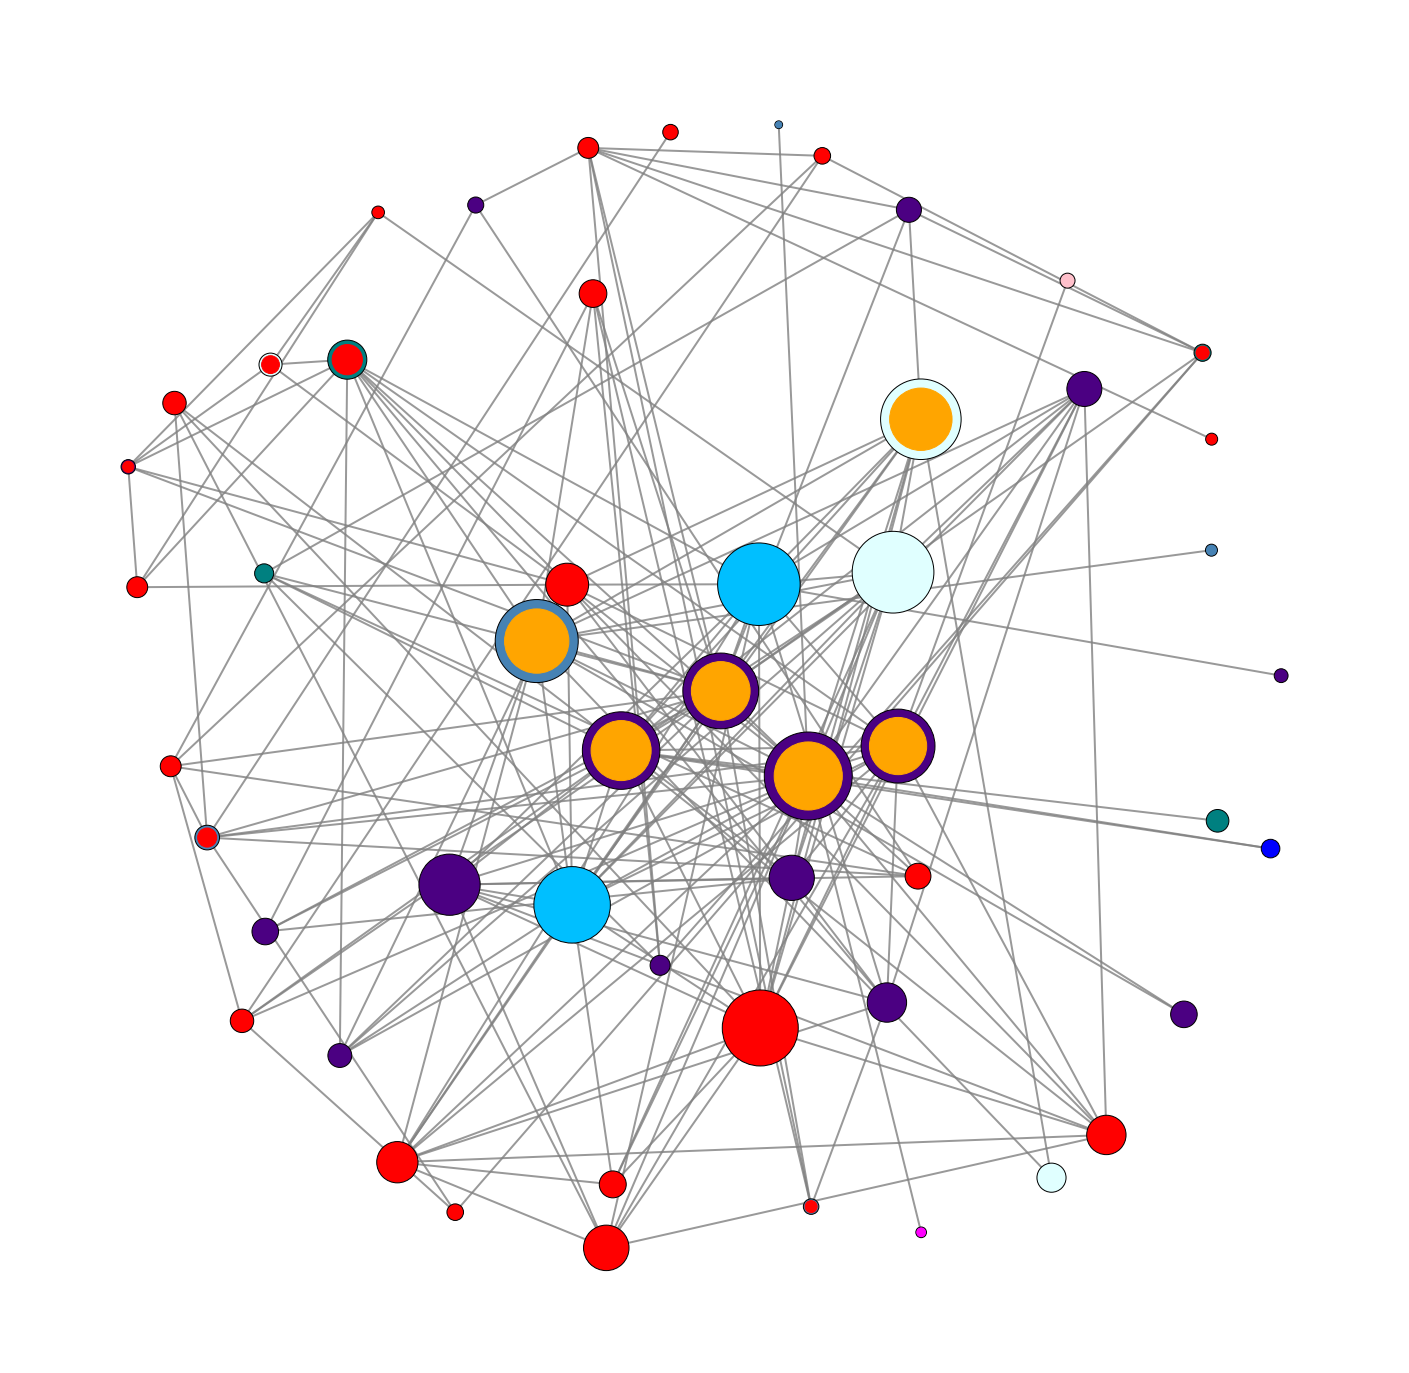

In [339]:

scalef = 10
x = 20
#ring_frac = np.sqrt((x-1.)/x)
ring_frac = (x-8.)/x
edge_width = 2
posG_spring = nx.spring_layout(BPA_core_dis_subnetwork,k=1.8,weight=100,scale=0.5)

l_x = []
l_y = []
l_size_outer = []
l_size_inner = []
color_inner = []
color_outer = []
for node in BPA_core_dis_subnetwork.nodes():

    k = nx.degree(G_ppi_heart,node)
    #k=300
    R = scalef*(5+k**1.15)
    r = ring_frac * R
    l_size_outer.append(R)
    l_size_inner.append(r)
    l_x.append(posG_spring[node][0])
    l_y.append(posG_spring[node][1])
    
    if node in Unifiedcoreheart_list:
        try:
            if disease_genelist_counter[node]==1:
                for k,v in color_dict.items():
                    if node in v[0]:
                        color_inner.append('red')
                        color_outer.append(v[1])

            else:
                color_inner.append('red')
                color_outer.append('indigo')
        except:
            color_inner.append('red')
            color_outer.append('red')

            
            
    else:
        try:
            if disease_genelist_counter[node]==1:
                for k,v in color_dict.items():
                    if node in v[0]:
                        color_inner.append(v[1])
                        color_outer.append(v[1])
            else:
                color_inner.append('indigo')
                color_outer.append('indigo')
        except:
            if dis_candidate_genelist_counter[node]==1:
                for k,v in color_candidate_dict.items():
                    if node in v[0]:
                        color_inner.append("orange")
                        color_outer.append(v[1])
            else:
                color_inner.append('orange')
                color_outer.append('indigo')

            

plt.figure(figsize=(25,25))


#nx.draw_networkx_labels(BPA_core_dis_subnetwork,pos=posG_spring,font_size=20)
nx.draw_networkx_edges(BPA_core_dis_subnetwork, pos=posG_spring, width= edge_width,edge_color='grey',alpha=.8)

plt.scatter(l_x,l_y,s=l_size_outer,c = color_outer,edgecolors='k',zorder=2)
plt.scatter(l_x,l_y,s=l_size_inner,c = color_inner,label = 'genes',zorder=2,alpha=1)

    
ax = plt.gca()

# ax.set_xticks(range(len(l_r)))    
# ax.set_xticklabels(x_ticks, rotation=90) #set the labels and rotate them 90 deg.
tick_color = 'w'
plt.tick_params(axis='both', which='major', colors=tick_color,labelsize=16)
plt.box(False)
plt.savefig('Federica/Federica_Figures/Fig5D.png',transparent=True) 

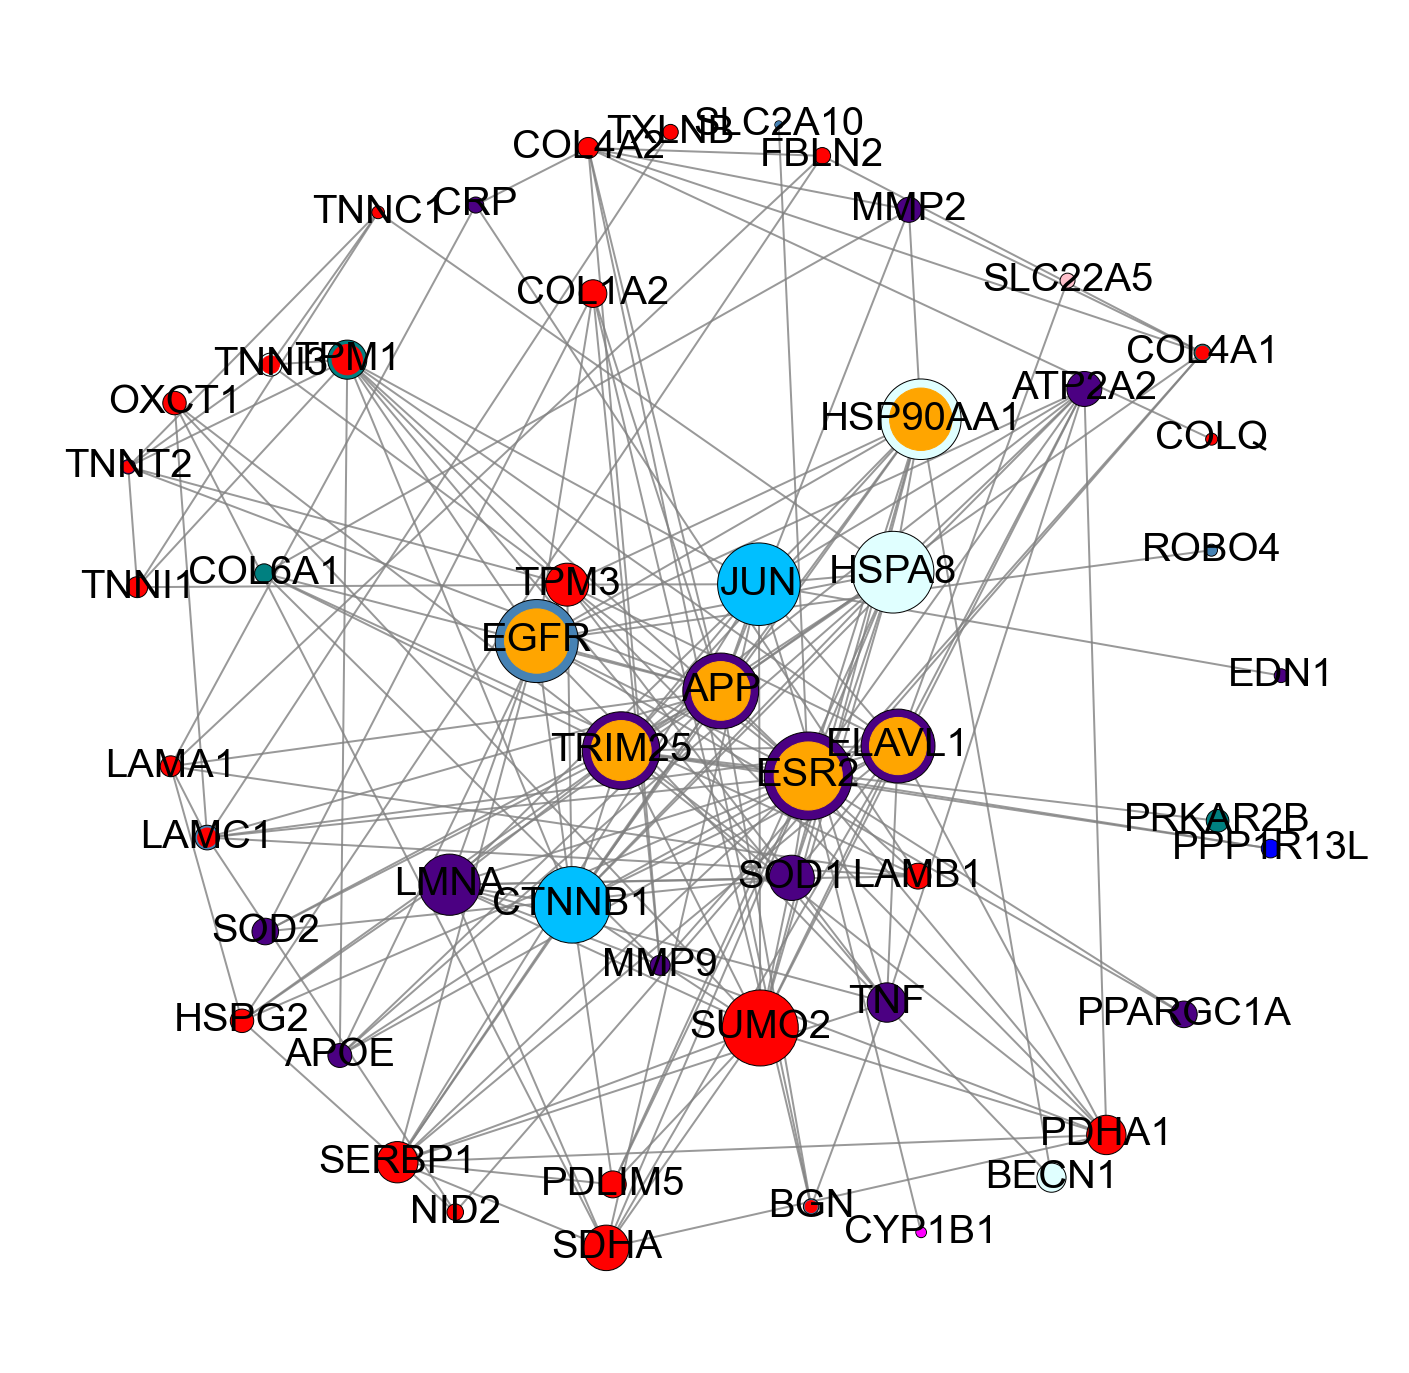

In [340]:
plt.figure(figsize=(25,25))


#nx.draw_networkx_labels(BPA_core_dis_subnetwork,pos=posG_spring,font_size=20)
nx.draw_networkx_edges(BPA_core_dis_subnetwork, pos=posG_spring, width= edge_width,edge_color='grey',alpha=.8)

plt.scatter(l_x,l_y,s=l_size_outer,c = color_outer,edgecolors='k',zorder=2)
plt.scatter(l_x,l_y,s=l_size_inner,c = color_inner,label = 'genes',zorder=2,alpha=1)

nx.draw_networkx_labels(BPA_core_dis_subnetwork,pos=posG_spring,font_size=40)
ax = plt.gca()

# ax.set_xticks(range(len(l_r)))    
# ax.set_xticklabels(x_ticks, rotation=90) #set the labels and rotate them 90 deg.
tick_color = 'w'
plt.tick_params(axis='both', which='major', colors=tick_color,labelsize=16)
plt.box(False)



In [354]:
#Let's repeat the analyses including KEGG
lib_list=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021','KEGG_2021_Human']
bpa_BPA_core_dis_subnetwork_enr_df=enrichment_from_genelist(list(BPA_core_dis_subnetwork.nodes()),lib_list)
bpa_BPA_core_dis_subnetwork_enr_aggdf=pd.concat([v.res2d for v in list(bpa_BPA_core_dis_subnetwork_enr_df.values())], join="inner")
bpa_BPA_core_dis_subnetwork_enr_aggdf=bpa_BPA_core_dis_subnetwork_enr_aggdf[bpa_BPA_core_dis_subnetwork_enr_aggdf['Adjusted P-value']<0.05]



/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

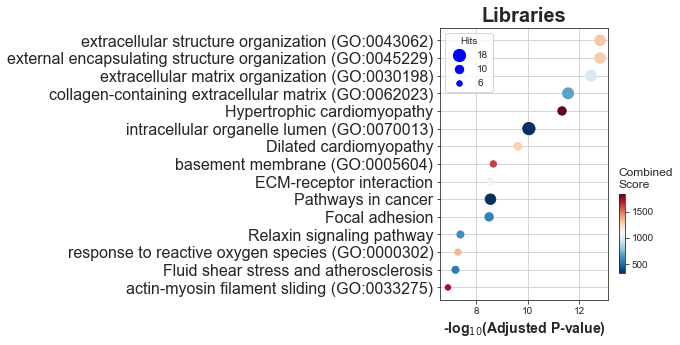

In [344]:

from gseapy import barplot, dotplot
# categorical scatterplot
ax = dotplot(bpa_BPA_core_dis_subnetwork_enr_aggdf,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=15,
              figsize=(3,5),
              title = "Libraries",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

In [348]:
#Let's repeat the analyses including KEGG
lib_list=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021']
bpa_BPA_core_dis_subnetwork_enr_df=enrichment_from_genelist(list(BPA_core_dis_subnetwork.nodes()),lib_list)
bpa_BPA_core_dis_subnetwork_enr_aggdf=pd.concat([v.res2d for v in list(bpa_BPA_core_dis_subnetwork_enr_df.values())], join="inner")
bpa_BPA_core_dis_subnetwork_enr_aggdf=bpa_BPA_core_dis_subnetwork_enr_aggdf[bpa_BPA_core_dis_subnetwork_enr_aggdf['Adjusted P-value']<0.05]

from gseapy import barplot, dotplot
ax = dotplot(bpa_BPA_core_dis_subnetwork_enr_aggdf,
              column="Adjusted P-value",ofname='Federica_Figures/bpa_BPA_core_dis_subnetwork_enr_df.pdf',
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,8),
              title = "Gene Ontology",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/lsd/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
<ipython-input-537-b121d24fc6f0>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)


<Figure size 3000x3000 with 0 Axes>

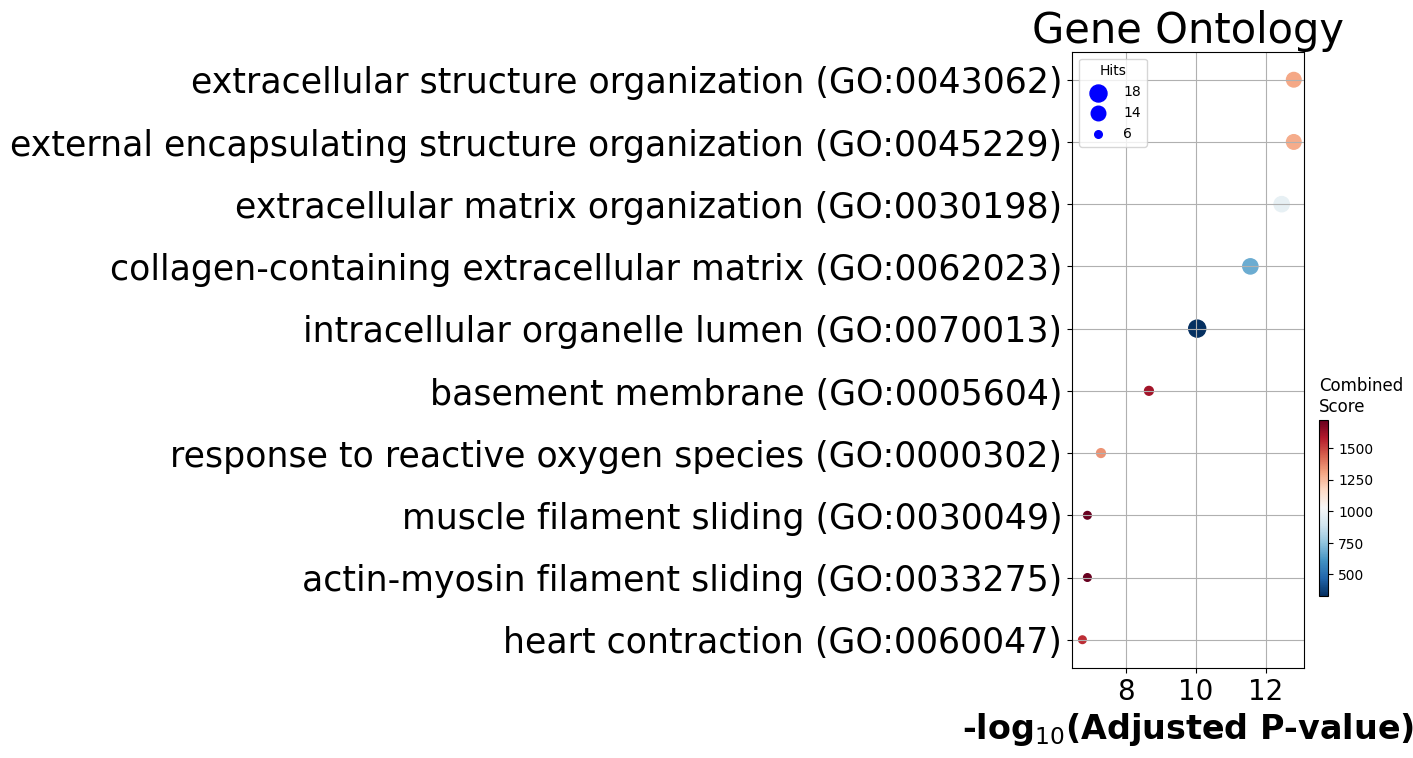

In [537]:
#Let's repeat the analyses excluding KEGG
lib_list=['GO_Biological_Process_2021','GO_Molecular_Function_2021','GO_Cellular_Component_2021']
bpa_BPA_core_dis_subnetwork_enr_df=enrichment_from_genelist(list(BPA_core_dis_subnetwork.nodes()),lib_list)
bpa_BPA_core_dis_subnetwork_enr_aggdf=pd.concat([v.res2d for v in list(bpa_BPA_core_dis_subnetwork_enr_df.values())], join="inner")
bpa_BPA_core_dis_subnetwork_enr_aggdf=bpa_BPA_core_dis_subnetwork_enr_aggdf[bpa_BPA_core_dis_subnetwork_enr_aggdf['Adjusted P-value']<0.05]

from gseapy import barplot, dotplot
plt.figure(figsize=(30,30))
ax = dotplot(bpa_BPA_core_dis_subnetwork_enr_aggdf,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=15,
              top_term=10,
              figsize=(3,8),
              title = "Gene Ontology",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )
ax.set_yticklabels(ax.get_yticklabels(), fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=24)
ax.set_title("Gene Ontology", fontsize=30)

plt.savefig('Federica_Figures/bpa_BPA_core_dis_subnetwork_enr_aggdf.pdf', bbox_inches="tight", dpi=300)


In [59]:
import scipy


#Let's convert these proximity values to p-values


heart_degs_ppi_and_core_components_proximity_pval={}
for condition in list(set(l[0] for l in list(heart_degs_ppi_and_core_components_proximity.keys()))):
    dis_list=[]
    pval_list=[]
    for cond_dis_pair,prox_dict in heart_degs_ppi_and_core_components_proximity.items():
        if condition==cond_dis_pair[0]:
            dis_list.append(cond_dis_pair[1])
            pval_list.append(scipy.stats.norm.sf(abs(prox_dict[1])))
        heart_degs_ppi_and_core_components_proximity_pval[condition]=[dis_list,pval_list]

    

In [60]:
import statsmodels.stats as stat                          #here, we apply a FDR adjustment on the p-values calculated
def fdr_adjustment(list_of_pvals):                       
    return stat.multitest.fdrcorrection(list_of_pvals)[1] 
    
    
heart_degs_ppi_and_core_components_proximity_fdr_significant={}
for condition,dis_pval_list in heart_degs_ppi_and_core_components_proximity_pval.items():
    adj_pvals=fdr_adjustment(dis_pval_list[1])
    dis_list=dis_pval_list[0]
    overlapped_disease_pval_adj={}
    for el in range(len(adj_pvals)):
        overlapped_disease_pval_adj[dis_list[el]]=adj_pvals[el]

    significantly_overlapped_disease_pval_adj={}
    for k,v in overlapped_disease_pval_adj.items():
        if v<0.05:
            significantly_overlapped_disease_pval_adj[k]=v
        else:
            pass
    heart_degs_ppi_and_core_components_proximity_fdr_significant[condition]=significantly_overlapped_disease_pval_adj
        
        

In [61]:
heart_degs_ppi_and_core_components_proximity_fdr_significant_dis_names={}

for condition, dis_proximity_dist in heart_degs_ppi_and_core_components_proximity_fdr_significant.items():
    new_dis_proximity_dist={}
    for dis_id,prox_val in dis_proximity_dist.items():
        new_dis_proximity_dist[disgenet_disease_associations_df[disgenet_disease_associations_df['diseaseId']==dis_id]['diseaseName'].values[0]]=prox_val
    heart_degs_ppi_and_core_components_proximity_fdr_significant_dis_names[condition]=dict(sorted(new_dis_proximity_dist.items(), key=lambda item: item[1]))
        





In [62]:
for condition, dis_dict in heart_degs_ppi_and_core_components_proximity_fdr_significant_dis_names.items():
    print("%s:%s diseases" %(condition, len(dis_dict)))

heart_bpa_l_down:2033 diseases
heart_deg_l:2270 diseases
Up_high_core:504 diseases
heart_bpa_m_up:1739 diseases
Up_medium_core2:197 diseases
Up_low_core:2309 diseases
heart_deg_m:1861 diseases
heart_bpa_h_up:910 diseases
Up_medium_core1:1847 diseases
heart_bpa_h_down:693 diseases
heart_bpa_m_down:318 diseases
heart_deg_h:1483 diseases
heart_bpa_l_up:2266 diseases
